# **1. Preparación datos**

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pathlib import Path
import seaborn as sns
import gdown

# Montaje de Google Drive para acceder a archivos del proyecto
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# ID del archivo
file_id = "1c-ebPZtK36e_8Wy0GglZ77poM3EWA3o6"
# URL de descarga directa
url = f"https://drive.google.com/uc?id={file_id}"

# Leer el archivo CSV
df_leticia = pd.read_csv(url, sep=';', encoding='utf-8-sig')


In [5]:
df_leticia.head()

,FECHA,ACTIVA,REACTIVA,FP,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M,QV2M,PRECTOTCORR,PS,WS10M,WS50M,WS2M,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,ALLSKY_KT
0,1-01-2014,95175,34334,0.94,7.25,5.31,25.98,18.89,1.17,99.74,0.90,2.25,0.23,0.40,0.01,2.82,0.51
1,2-01-2014,114592,41141,0.94,7.15,4.13,26.38,19.31,5.10,99.63,0.74,1.60,0.25,0.34,0.01,2.47,0.40
2,3-01-2014,112809,41199,0.94,6.95,5.48,26.06,19.69,5.77,99.62,0.82,2.15,0.22,0.38,0.01,2.67,0.53
3,4-01-2014,109032,40996,0.94,7.10,4.49,25.73,19.21,6.54,99.77,0.92,1.60,0.32,0.35,0.01,2.52,0.43
4,5-01-2014,97482,37382,0.93,7.06,4.76,25.27,19.12,46.53,99.87,0.83,1.99,0.25,0.36,0.01,2.56,0.46


In [6]:
df_leticia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4203 entries, 0 to 4202
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FECHA                4203 non-null   object 
 1   ACTIVA               3835 non-null   object 
 2   REACTIVA             3804 non-null   object 
 3   FP                   3804 non-null   float64
 4   CLRSKY_SFC_SW_DWN    4108 non-null   float64
 5   ALLSKY_SFC_SW_DWN    4108 non-null   float64
 6   T2M                  4202 non-null   float64
 7   QV2M                 4202 non-null   float64
 8   PRECTOTCORR          4202 non-null   float64
 9   PS                   4202 non-null   float64
 10  WS10M                4202 non-null   float64
 11  WS50M                4202 non-null   float64
 12  WS2M                 4202 non-null   float64
 13  ALLSKY_SFC_UVA       4108 non-null   float64
 14  ALLSKY_SFC_UVB       4108 non-null   float64
 15  ALLSKY_SFC_UV_INDEX  4108 non-null   f

### Estadísticas

In [ ]:
# Se eliminan las comas y se convierten los valores de 'ACTIVA' y 'REACTIVA' a tipo float
df_leticia['ACTIVA'] = (df_leticia['ACTIVA'].str.replace(',', '')).astype(float)
df_leticia['REACTIVA'] = (df_leticia['REACTIVA'].str.replace(',', '')).astype(float)

# Conversión de la columna 'FECHA' a formato datetime (con día primero)
df_leticia['FECHA'] = pd.to_datetime(df_leticia['FECHA'], dayfirst=True)

# Se filtran los datos hasta el 31 de marzo de 2025
df_leticia = df_leticia[df_leticia['FECHA'] < '2025-04-01']

In [ ]:
# Revisar cuántos valores nulos hay por columna
print("\nValores nulos por columna:")
print(df_leticia.isnull().sum())

# Porcentaje de nulos para saber si es grave
print("\nPorcentaje de nulos por columna:")
print((df_leticia.isnull().sum() / len(df_leticia) * 100).round(2))


Valores nulos por columna:
FECHA                    0
ACTIVA                 334
REACTIVA               365
FP                     365
CLRSKY_SFC_SW_DWN        0
ALLSKY_SFC_SW_DWN        0
T2M                      0
QV2M                     0
PRECTOTCORR              0
PS                       0
WS10M                    0
WS50M                    0
WS2M                     0
ALLSKY_SFC_UVA           0
ALLSKY_SFC_UVB           0
ALLSKY_SFC_UV_INDEX      0
ALLSKY_KT                0
dtype: int64

Porcentaje de nulos por columna:
FECHA                  0.00
ACTIVA                 8.13
REACTIVA               8.89
FP                     8.89
CLRSKY_SFC_SW_DWN      0.00
ALLSKY_SFC_SW_DWN      0.00
T2M                    0.00
QV2M                   0.00
PRECTOTCORR            0.00
PS                     0.00
WS10M                  0.00
WS50M                  0.00
WS2M                   0.00
ALLSKY_SFC_UVA         0.00
ALLSKY_SFC_UVB         0.00
ALLSKY_SFC_UV_INDEX    0.00
ALLSKY_KT         

In [ ]:
# Definir la columna 'FECHA' como índice temporal del DataFrame
df_leticia = df_leticia.set_index('FECHA')

In [ ]:
df_leticia.head()

,ACTIVA,REACTIVA,FP,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M,QV2M,PRECTOTCORR,PS,WS10M,WS50M,WS2M,ALLSKY_SFC_UVA,ALLSKY_SFC_UVB,ALLSKY_SFC_UV_INDEX,ALLSKY_KT
FECHA,,,,,,,,,,,,,,,,
2014-01-01,95175.0,34334.0,0.94,7.25,5.31,25.98,18.89,1.17,99.74,0.90,2.25,0.23,0.40,0.01,2.82,0.51
2014-01-02,114592.0,41141.0,0.94,7.15,4.13,26.38,19.31,5.10,99.63,0.74,1.60,0.25,0.34,0.01,2.47,0.40
2014-01-03,112809.0,41199.0,0.94,6.95,5.48,26.06,19.69,5.77,99.62,0.82,2.15,0.22,0.38,0.01,2.67,0.53
2014-01-04,109032.0,40996.0,0.94,7.10,4.49,25.73,19.21,6.54,99.77,0.92,1.60,0.32,0.35,0.01,2.52,0.43
2014-01-05,97482.0,37382.0,0.93,7.06,4.76,25.27,19.12,46.53,99.87,0.83,1.99,0.25,0.36,0.01,2.56,0.46


### Se generaron nuevas columnas que representan diferentes unidades de tiempo. Estas variables permiten al modelo capturar variaciones estacionales y tendencias asociadas al calendario.





In [ ]:
# Extracción de características temporales
df_leticia['year'] = df_leticia.index.year
df_leticia['month'] = df_leticia.index.month
df_leticia['day'] = df_leticia.index.day
df_leticia['weekday'] = df_leticia.index.weekday  # Lunes=0, Domingo=6
df_leticia['weekofyear'] = df_leticia.index.isocalendar().week.astype(int)
df_leticia['quarter'] = df_leticia.index.quarter
df_leticia['dayofyear'] = df_leticia.index.dayofyear

# Transformación a variables cíclicas
df_leticia['month_sin'] = np.sin(2 * np.pi * df_leticia['month'] / 12)
df_leticia['month_cos'] = np.cos(2 * np.pi * df_leticia['month'] / 12)
df_leticia['dayofyear_sin'] = np.sin(2 * np.pi * df_leticia['dayofyear'] / 365)
df_leticia['dayofyear_cos'] = np.cos(2 * np.pi * df_leticia['dayofyear'] / 365)
df_leticia['weekday_sin'] = np.sin(2 * np.pi * df_leticia['weekday'] / 7)
df_leticia['weekday_cos'] = np.cos(2 * np.pi * df_leticia['weekday'] / 7)
df_leticia['weekofyear_sin'] = np.sin(2 * np.pi * df_leticia['weekofyear'] / 52)
df_leticia['weekofyear_cos'] = np.cos(2 * np.pi * df_leticia['weekofyear'] / 52)

# Verificación rápida de las nuevas columnas
print("\nDataFrame df_leticia después de añadir características temporales:")
print(df_leticia.info())
print(df_leticia.head())
print(df_leticia.dtypes)


DataFrame df_leticia después de añadir características temporales:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4108 entries, 2014-01-01 to 2025-03-31
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ACTIVA               3774 non-null   float64
 1   REACTIVA             3743 non-null   float64
 2   FP                   3743 non-null   float64
 3   CLRSKY_SFC_SW_DWN    4108 non-null   float64
 4   ALLSKY_SFC_SW_DWN    4108 non-null   float64
 5   T2M                  4108 non-null   float64
 6   QV2M                 4108 non-null   float64
 7   PRECTOTCORR          4108 non-null   float64
 8   PS                   4108 non-null   float64
 9   WS10M                4108 non-null   float64
 10  WS50M                4108 non-null   float64
 11  WS2M                 4108 non-null   float64
 12  ALLSKY_SFC_UVA       4108 non-null   float64
 13  ALLSKY_SFC_UVB       4108 non-null   float64
 14  AL

In [ ]:
df_leticia.head()

,ACTIVA,REACTIVA,FP,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DWN,T2M,QV2M,PRECTOTCORR,PS,WS10M,...,quarter,dayofyear,month_sin,month_cos,dayofyear_sin,dayofyear_cos,weekday_sin,weekday_cos,weekofyear_sin,weekofyear_cos
FECHA,,,,,,,,,,,,,,,,,,,,,
2014-01-01,95175.0,34334.0,0.94,7.25,5.31,25.98,18.89,1.17,99.74,0.90,...,1,1,0.5,0.866025,0.017213,0.999852,0.974928,-0.222521,0.120537,0.992709
2014-01-02,114592.0,41141.0,0.94,7.15,4.13,26.38,19.31,5.10,99.63,0.74,...,1,2,0.5,0.866025,0.034422,0.999407,0.433884,-0.900969,0.120537,0.992709
2014-01-03,112809.0,41199.0,0.94,6.95,5.48,26.06,19.69,5.77,99.62,0.82,...,1,3,0.5,0.866025,0.051620,0.998667,-0.433884,-0.900969,0.120537,0.992709
2014-01-04,109032.0,40996.0,0.94,7.10,4.49,25.73,19.21,6.54,99.77,0.92,...,1,4,0.5,0.866025,0.068802,0.997630,-0.974928,-0.222521,0.120537,0.992709
2014-01-05,97482.0,37382.0,0.93,7.06,4.76,25.27,19.12,46.53,99.87,0.83,...,1,5,0.5,0.866025,0.085965,0.996298,-0.781831,0.623490,0.120537,0.992709


## **1.1. Valores Nulos**

### 1.1.1. Imputación 'ACTIVA'

La función plot_missing permite visualizar una serie temporal (variable ACTIVA) resaltando de forma clara los tramos en los que hay valores faltantes consecutivos. Utiliza una detección secuencial para identificar grupos de NaN contiguos y, si el número de días perdidos supera un umbral mínimo (min_gap), los resalta como franjas rojas en el gráfico. Esto facilita la identificación visual de periodos problemáticos en los datos, lo cual es fundamental en tareas de limpieza o imputación en series de tiempo.

In [ ]:
# Función para graficar una serie temporal con intervalos largos de valores faltantes resaltados
def plot_missing(series, title="Serie ACTIVA con faltantes", min_gap=5):
    plt.figure(figsize=(12, 5))
    sns.set_style("whitegrid")

    # Se grafica la serie original
    plt.plot(series.index, series.values, marker='o', linestyle='-', color='#2a9d8f', label='ACTIVA')

    # Identificación de bloques consecutivos de NaN
    is_nan = series.isna()
    nan_groups = (is_nan != is_nan.shift()).cumsum()
    nan_ranges = series[is_nan].groupby(nan_groups).apply(lambda x: (x.index[0], x.index[-1]))

    # Resaltado de intervalos largos con NaN
    for start, end in nan_ranges:
        gap_length = (end - start).days + 1
        if gap_length >= min_gap:
            plt.axvspan(start, end, color='red', alpha=0.2, label='Intervalo largo (NaN)')

    # Ajuste para evitar leyendas duplicadas
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Formato del gráfico
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Valor', fontsize=12)
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.show()


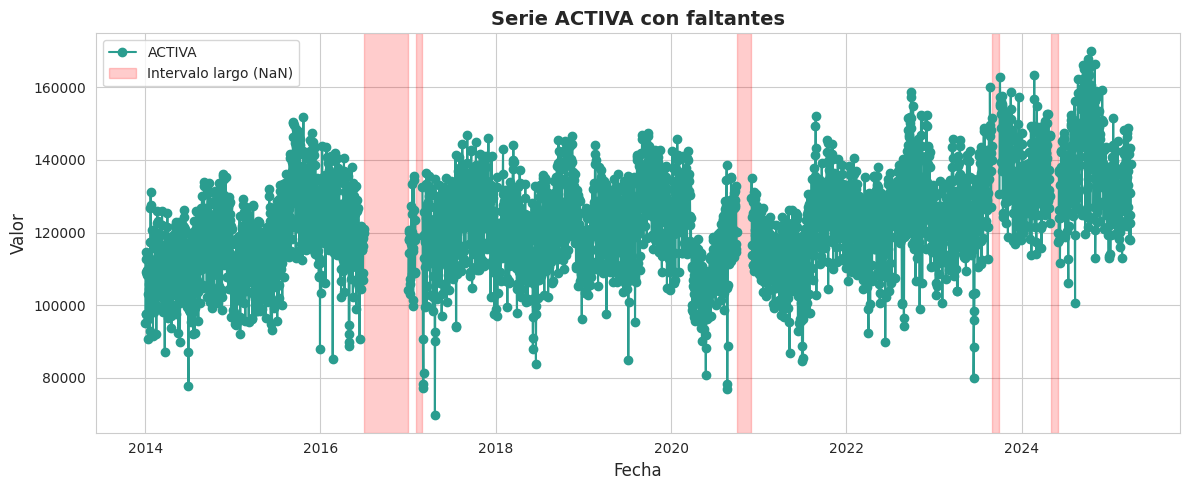

In [ ]:
plot_missing(df_leticia['ACTIVA'])

El siguiente bloque identifica periodos con valores faltantes en la variable ACTIVA y los imputa tomando como referencia los valores del mismo día del año anterior, ajustados por la diferencia promedio entre los meses anteriores y posteriores al hueco. Este enfoque permite conservar la estacionalidad diaria y capturar cambios de tendencia sin eliminar la estructura temporal.

In [ ]:
# Lista de periodos con valores faltantes en la variable 'ACTIVA'
missing_periods = [
    ('2016-07-01', '2016-12-31'),
    ('2017-02-01', '2017-02-28'),
    ('2020-10-01', '2020-11-30'),
    ('2023-09-01', '2023-09-30'),
    ('2024-05-01', '2024-05-31')
]
missing_periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in missing_periods]

# Copia del DataFrame para imputación
df_leticia_imputado = df_leticia.copy()

for start, end in missing_periods:
    # Rango de dos meses antes de la discontinuidad
    anterior_inicio = (start - pd.DateOffset(months=2)).replace(day=1)
    anterior_fin = start - pd.DateOffset(days=1)

    # Rango de dos meses después de la discontinuidad
    posterior_inicio = end + pd.DateOffset(days=1)
    posterior_fin = (end + pd.DateOffset(months=2)).replace(day=1) + pd.offsets.MonthEnd(0)

    # Promedios excluyendo NaNs
    prom_ant = df_leticia_imputado.loc[anterior_inicio:anterior_fin, 'ACTIVA'].dropna().mean()
    prom_pos = df_leticia_imputado.loc[posterior_inicio:posterior_fin, 'ACTIVA'].dropna().mean()

    delta = prom_pos - prom_ant

    # Rango de la discontinuidad a imputar
    dias_hueco = pd.date_range(start, end, freq='D')

    for fecha in dias_hueco:
        try:
            fecha_referencia = fecha - pd.DateOffset(years=1)
            valor_ref = df_leticia_imputado.loc[fecha_referencia, 'ACTIVA']

            if pd.notna(valor_ref):
                df_leticia_imputado.at[fecha, 'ACTIVA'] = valor_ref + delta
        except KeyError:
            continue  # fecha de referencia no existe (por ejemplo, 29 de febrero)

In [ ]:
# Ver qué valores fueron imputados
df_imputados = df_leticia_imputado.loc[df_leticia['ACTIVA'].isna(), ['ACTIVA']]
print(df_imputados)

                   ACTIVA
FECHA                    
2016-07-01  121854.144897
2016-07-02  124550.144897
2016-07-03  127351.144897
2016-07-04  106697.144897
2016-07-05   94271.144897
...                   ...
2024-05-27  127344.049180
2024-05-28  116120.049180
2024-05-29  136948.049180
2024-05-30  139651.049180
2024-05-31  132450.049180

[334 rows x 1 columns]


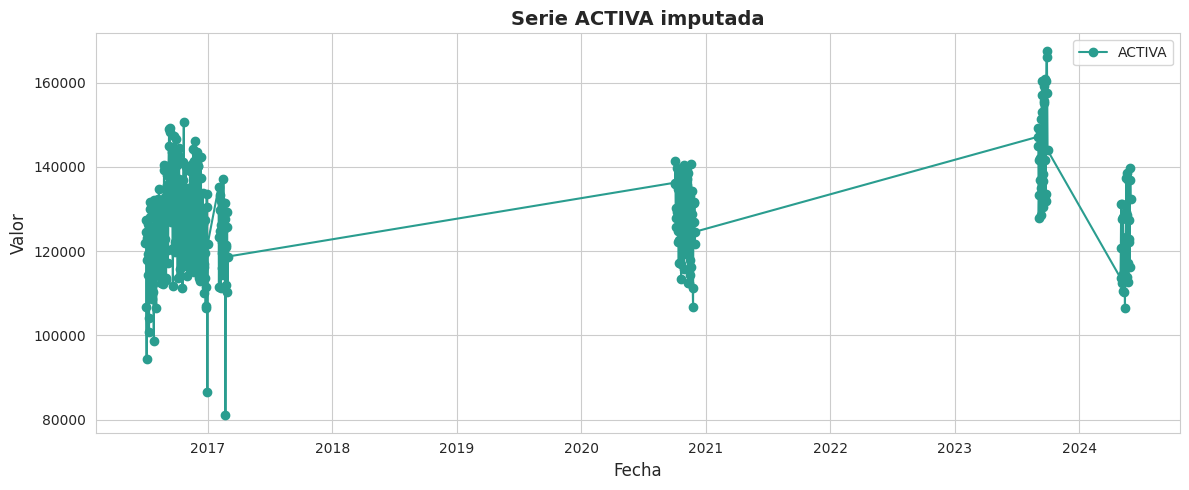

In [ ]:
# Visualización de la serie imputada para validar continuidad y posibles tramos con valores aún faltantes
plot_missing(df_imputados['ACTIVA'], "Serie ACTIVA imputada")

La siguiente función permite comparar la serie original con su versión imputada, resaltando tanto los intervalos largos de datos faltantes como los puntos en los que se completaron valores, con el fin de verificar visualmente la calidad de la imputación.

In [ ]:
# Función para visualizar valores faltantes en una serie temporal y destacar puntos imputados si se proporciona la serie completa
def plot_missing(series_original, series_imputada=None, title="Serie ACTIVA con faltantes", min_gap=5):
    plt.figure(figsize=(12, 5))
    sns.set_style("whitegrid")

    # Graficar la serie original, incluyendo los NaN
    plt.plot(series_original.index, series_original.values, marker='o', linestyle='-',
             color='#2a9d8f', label='ACTIVA original')

    # Identificar tramos contiguos con NaN
    is_nan = series_original.isna()
    nan_groups = (is_nan != is_nan.shift()).cumsum()  # Agrupa NaNs consecutivos
    nan_ranges = series_original[is_nan].groupby(nan_groups).apply(lambda x: (x.index[0], x.index[-1]))

    # Resaltar en rojo los intervalos largos de NaN
    for start, end in nan_ranges:
        gap_length = (end - start).days + 1
        if gap_length >= min_gap:
            plt.axvspan(start, end, color='red', alpha=0.2, label='Intervalos (NaN)')

    # Si se proporciona la serie imputada, graficar los puntos que fueron completados
    if series_imputada is not None:
        imputados = series_original.isna() & series_imputada.notna()
        plt.plot(series_imputada.index[imputados], series_imputada[imputados],
                 'o', color='orange', label='Valores imputados')

    # Eliminar etiquetas duplicadas en la leyenda
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    # Estética del gráfico
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Valor', fontsize=12)
    plt.legend(by_label.values(), by_label.keys())
    plt.tight_layout()
    plt.show()

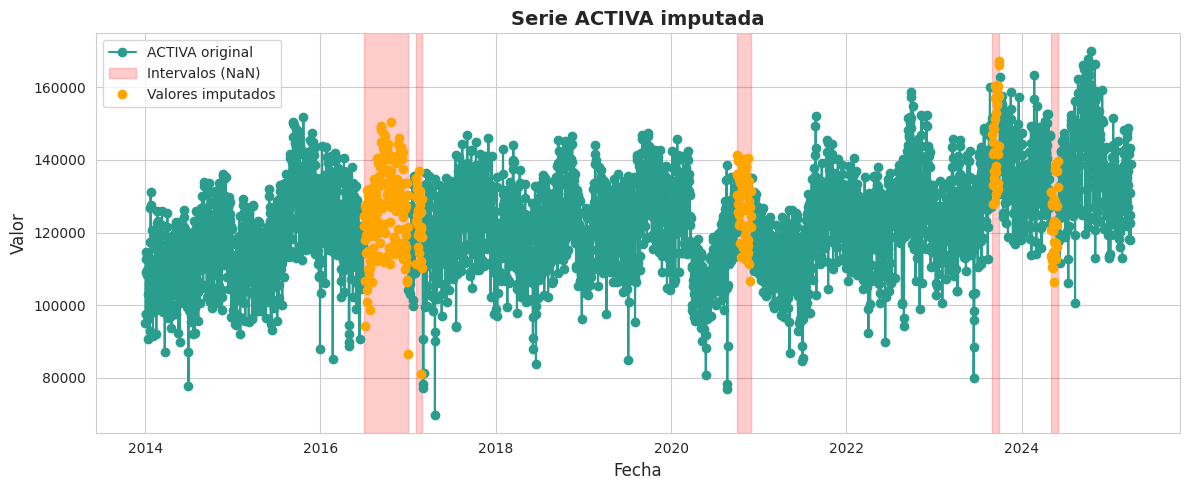

In [ ]:
plot_missing(df_leticia['ACTIVA'], df_leticia_imputado['ACTIVA'], "Serie ACTIVA imputada")

### 1.1.2. imputación 'FP'

In [ ]:
# Calcular la moda de la columna 'FP'
moda_fp = df_leticia_imputado['FP'].mode()[0]  # [0] porque mode() devuelve una Serie

# Reemplazar NaN con la moda
df_leticia_imputado['FP'] = df_leticia_imputado['FP'].fillna(moda_fp)

### 1.1.3. Imputación 'REACTIVA

In [ ]:
#Lo que hace es tomar el último valor no nulo y copiarlo hacia abajo hasta que se encuentre un nuevo valor válido.
df_leticia_imputado['REACTIVA'].fillna(method='ffill', inplace=True)

#Aquí se copian los valores válidos hacia arriba, es decir, los NaN se rellenan con el siguiente valor disponible.
df_leticia_imputado['REACTIVA'].fillna(method='bfill', inplace=True) # Por si los primeros valores son NaN

/tmp/ipython-input-19-1832208126.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_leticia_imputado['REACTIVA'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-19-1832208126.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_leticia_imputado['REACTIVA'].fillna(method='ffill', inplace=True)
/tmp/ipython-input-19-1832208126.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained as

In [ ]:
#Se asigna el def_leticia_imputado a la variable df para facilidad de invocación
df = df_leticia_imputado

In [ ]:
#Se rectifica que no hay ningún valor nulo
df.isna().sum()

,0
ACTIVA,0
REACTIVA,0
FP,0
CLRSKY_SFC_SW_DWN,0
ALLSKY_SFC_SW_DWN,0
T2M,0
QV2M,0
PRECTOTCORR,0
PS,0
WS10M,0


#**2. Análisis exploratorio**

### 2.1. Correralaciones

In [ ]:
# Selecciona las columnas numéricas del DataFrame para análisis de correlación
num_cols_corr = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols_corr

['ACTIVA',
 'REACTIVA',
 'FP',
 'CLRSKY_SFC_SW_DWN',
 'ALLSKY_SFC_SW_DWN',
 'T2M',
 'QV2M',
 'PRECTOTCORR',
 'PS',
 'WS10M',
 'WS50M',
 'WS2M',
 'ALLSKY_SFC_UVA',
 'ALLSKY_SFC_UVB',
 'ALLSKY_SFC_UV_INDEX',
 'ALLSKY_KT',
 'weekofyear',
 'month_sin',
 'month_cos',
 'dayofyear_sin',
 'dayofyear_cos',
 'weekday_sin',
 'weekday_cos',
 'weekofyear_sin',
 'weekofyear_cos']

In [ ]:
# Subconjunto del DataFrame solo con variables numéricas y booleanas
df_corr = df[num_cols_corr]

# Cálculo de la matriz de correlación de Pearson entre las variables seleccionadas
corr = df_corr.corr()

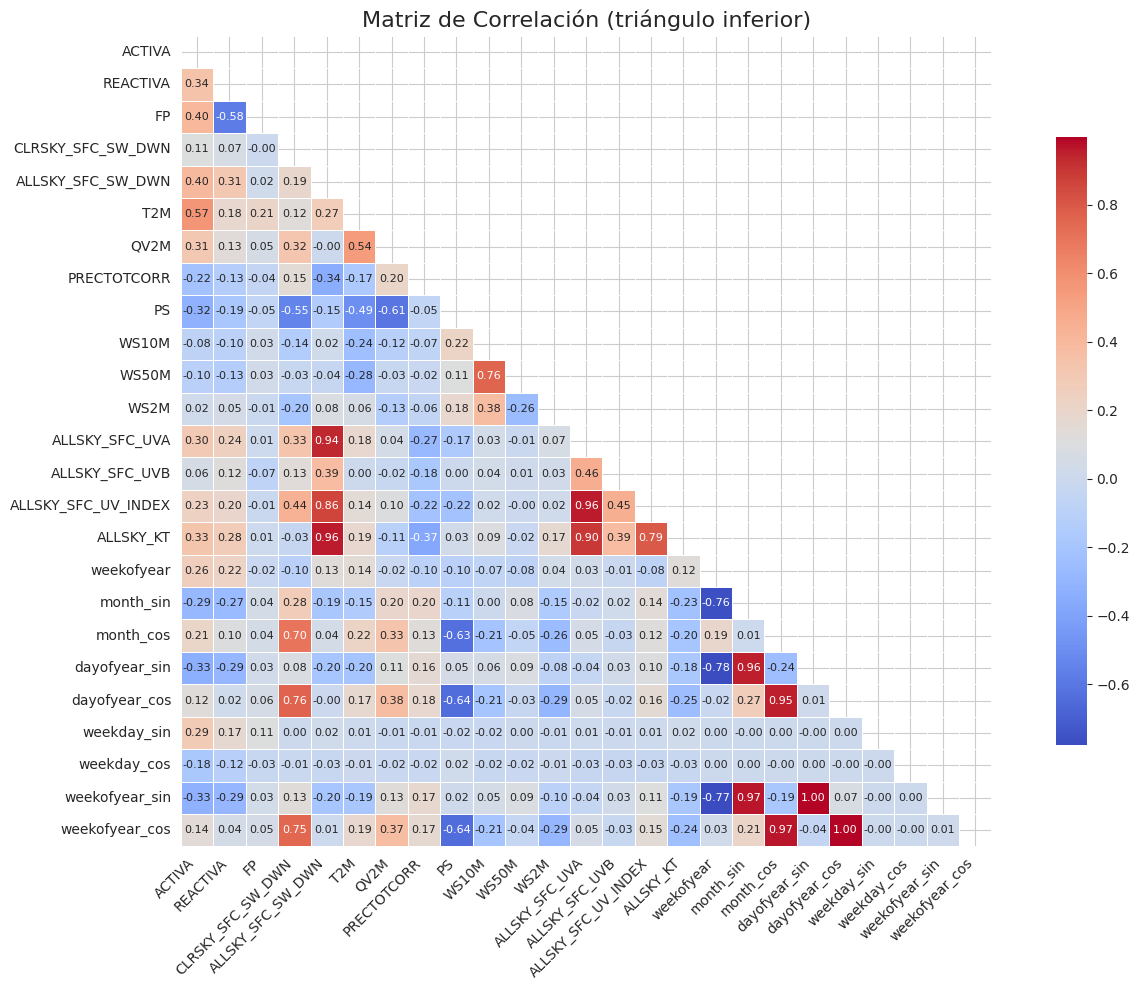

In [ ]:
# Crear máscara para ocultar el triángulo superior
import numpy as np

mask = np.triu(np.ones_like(corr, dtype=bool))  # Máscara para triángulo superior

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matriz de Correlación (triángulo inferior)", fontsize=16)
plt.tight_layout()
plt.show()

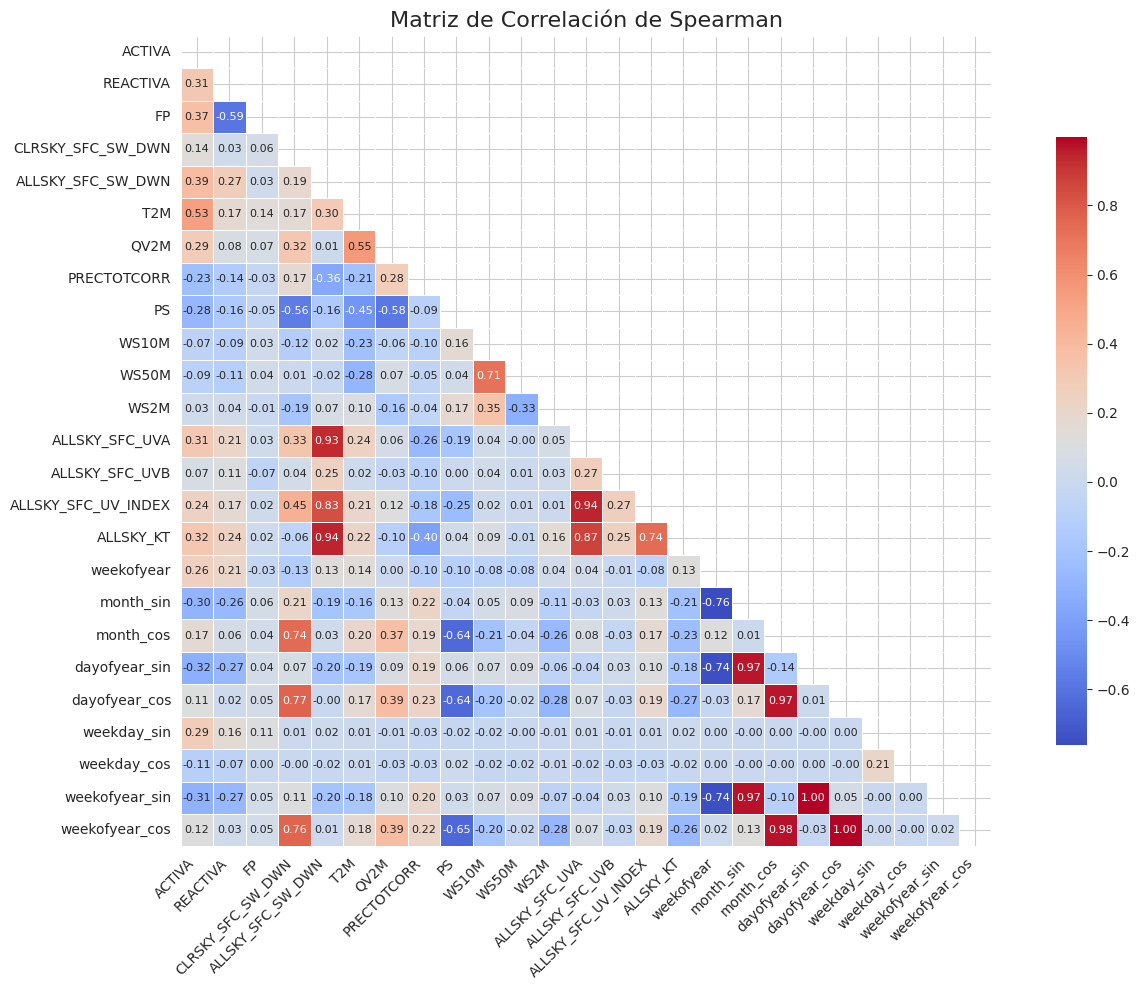

In [ ]:
# Matriz de correlación de Spearman
corr_spearman = df[num_cols_corr].corr(method='spearman')

# Máscara para triángulo superior
mask = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Graficar la matriz
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_spearman,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 8}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Matriz de Correlación de Spearman", fontsize=16)
plt.tight_layout()
plt.show()

### 2.2. Autocorrelación

 Autocorrelación (ACF) y autocorrelación parcial (PACF)


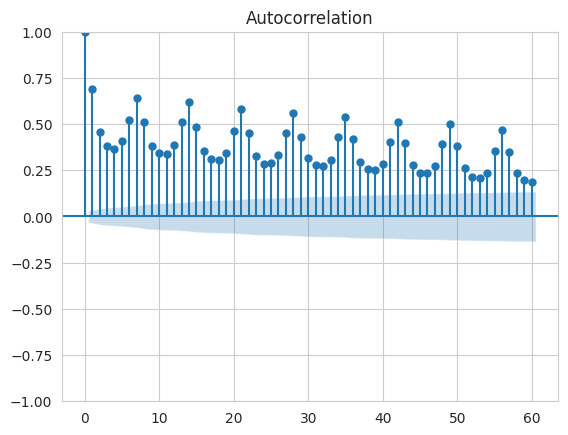

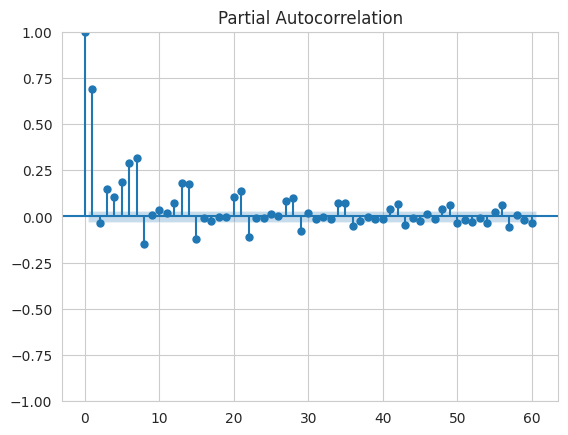

In [ ]:
# Importación de funciones para análisis de autocorrelación
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gráfico de la función de autocorrelación (ACF) para la variable ACTIVA
plot_acf(df['ACTIVA'], lags=60)
plt.show()

# Gráfico de la función de autocorrelación parcial (PACF)
plot_pacf(df['ACTIVA'], lags=60)
plt.show()

### 2.3. Boxplot univariados

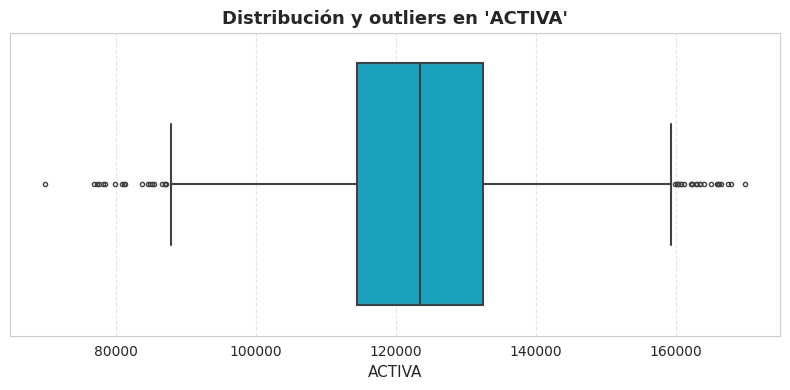

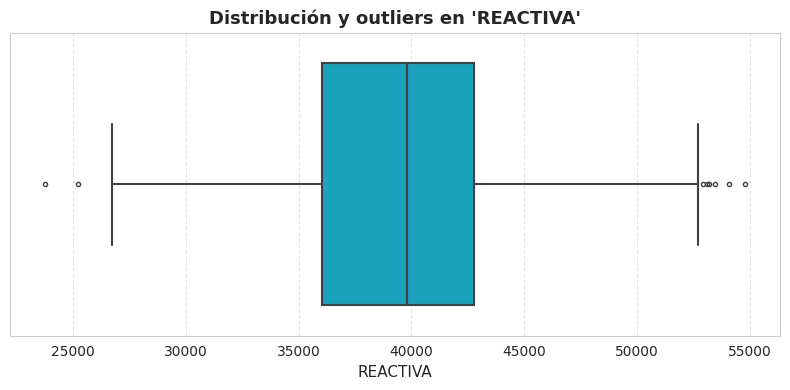

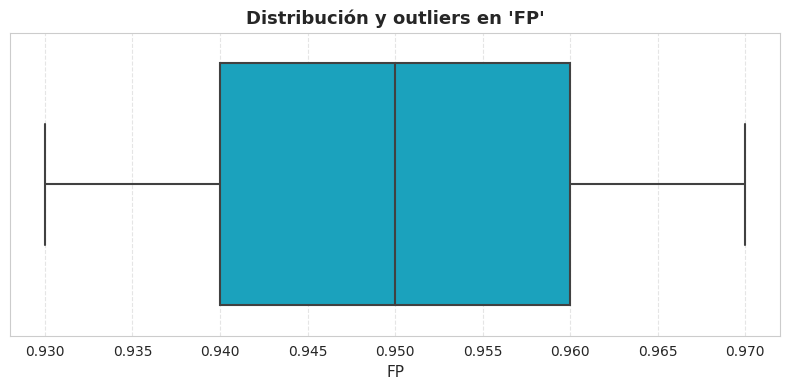

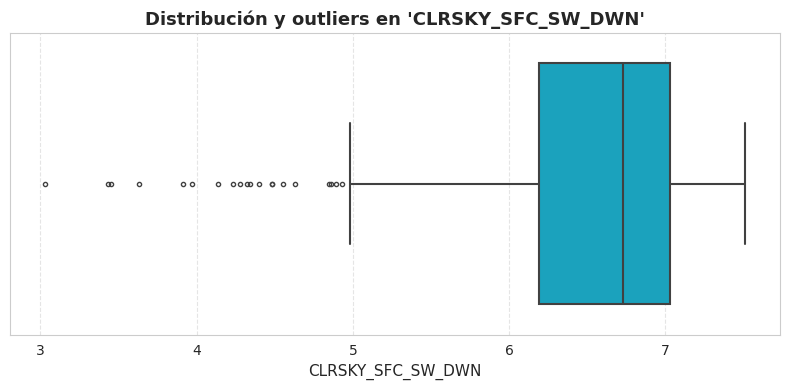

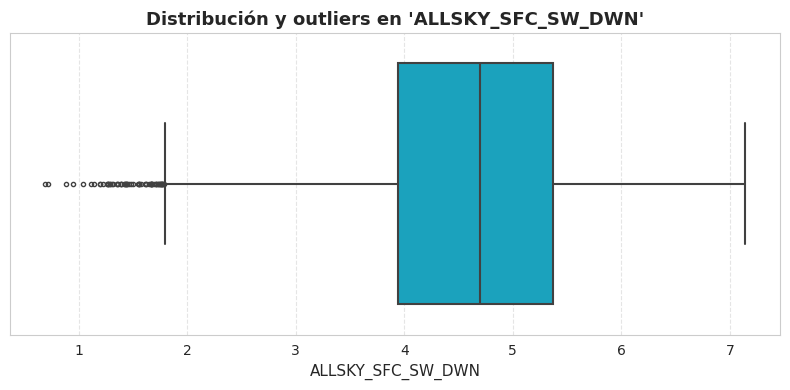

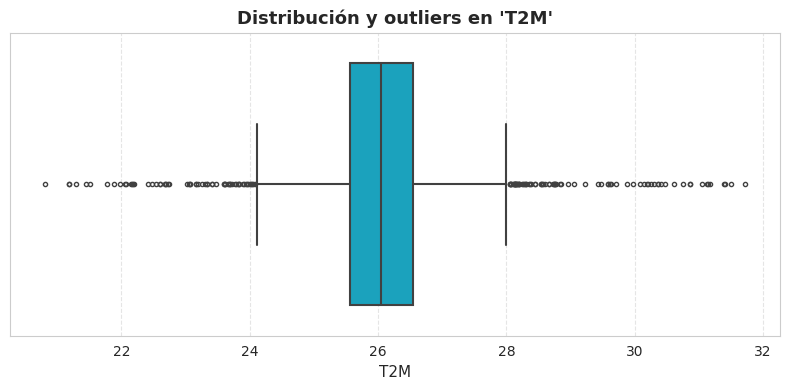

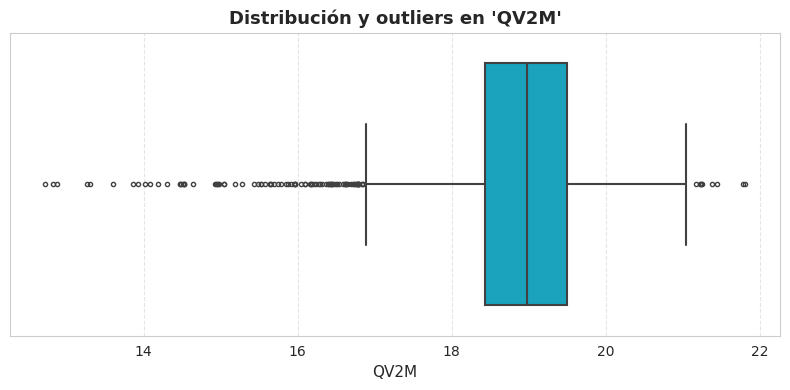

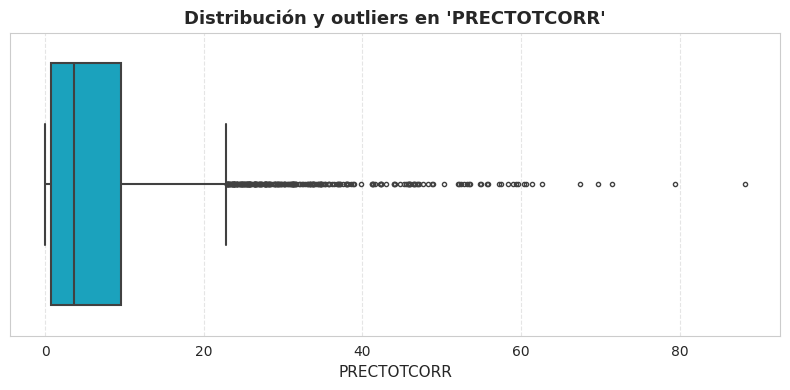

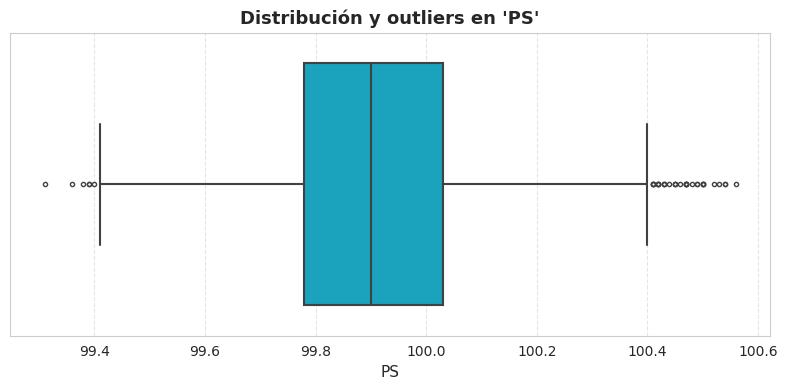

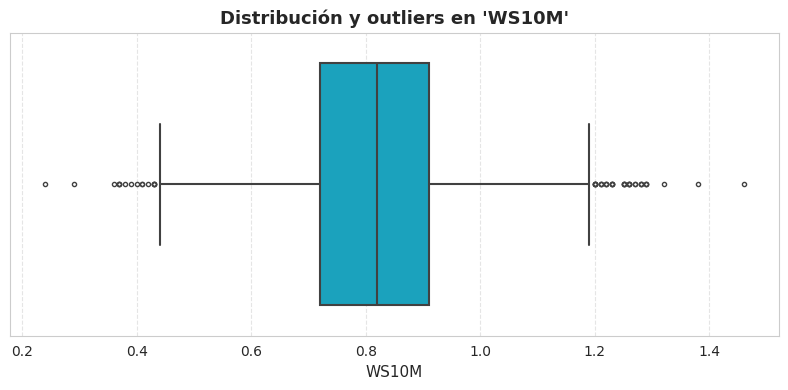

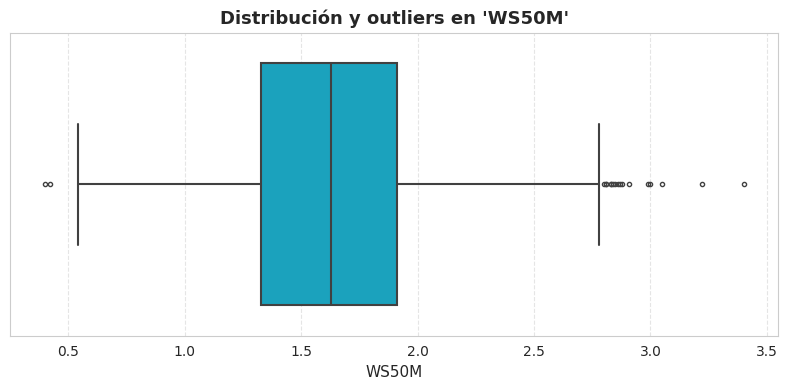

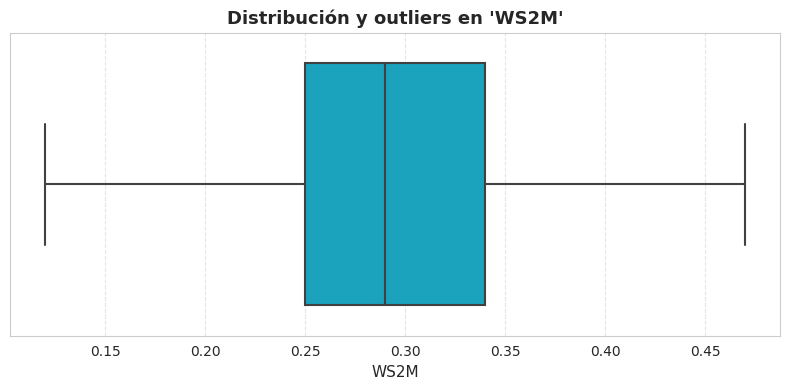

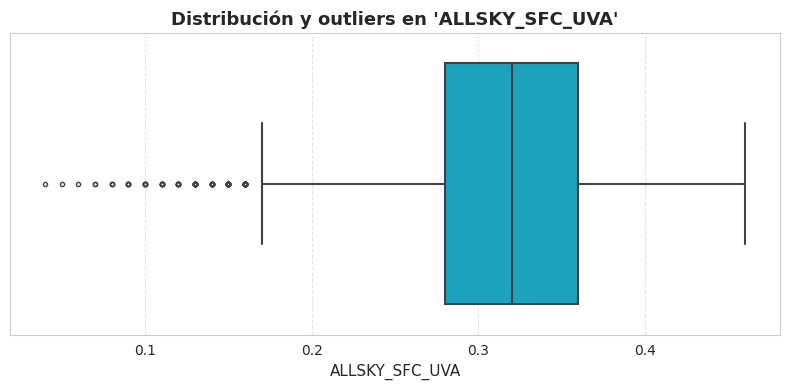

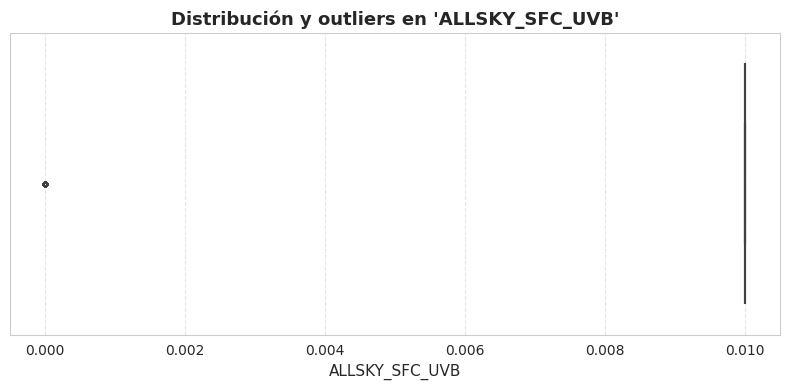

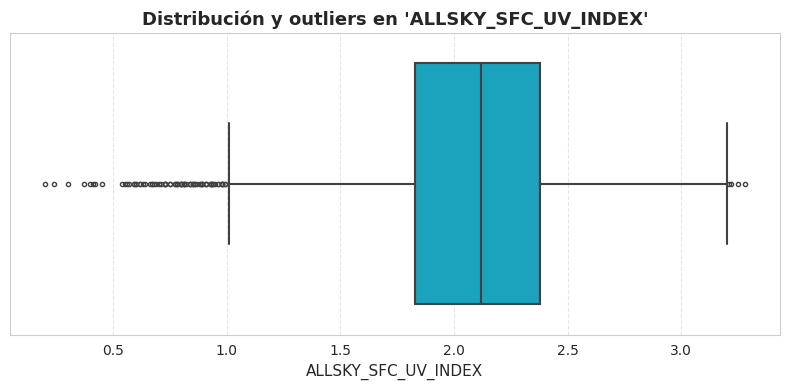

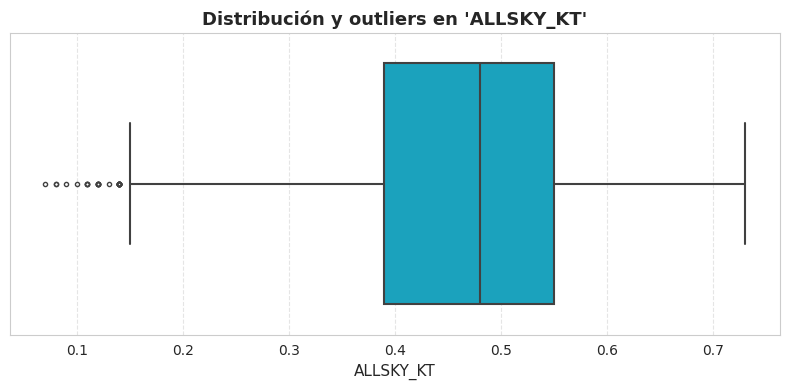

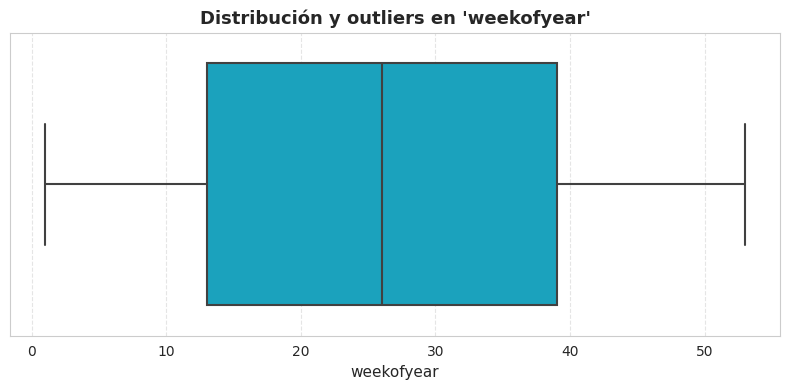

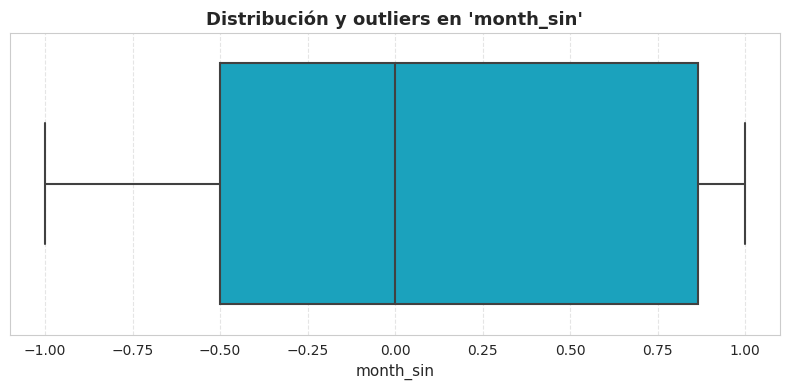

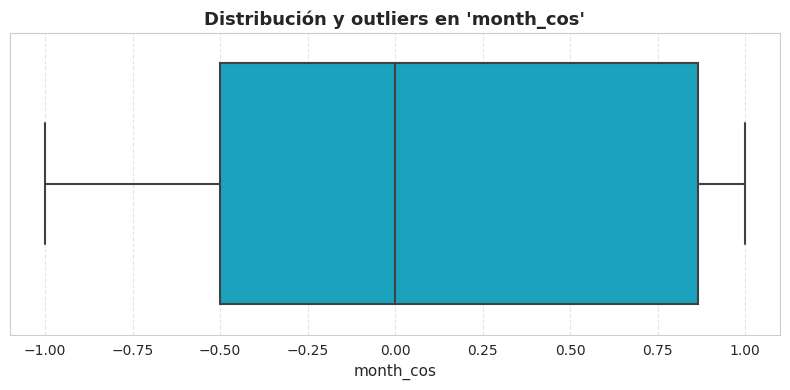

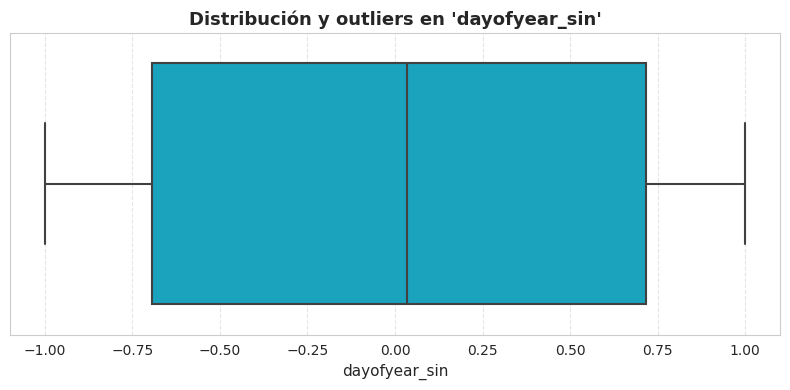

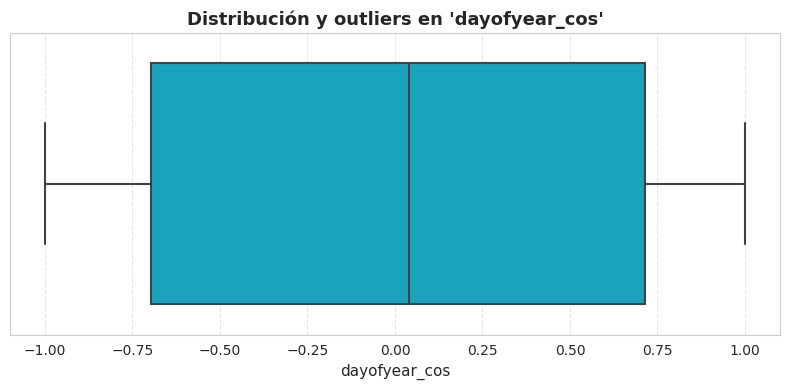

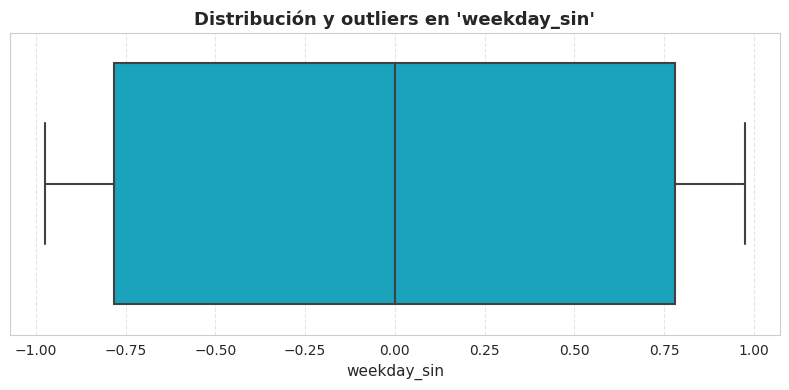

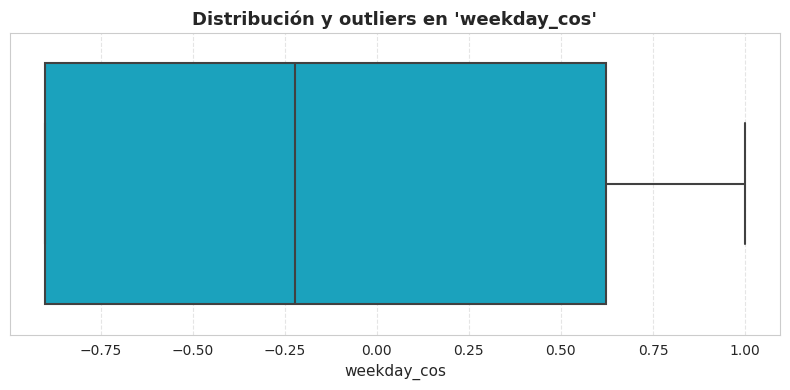

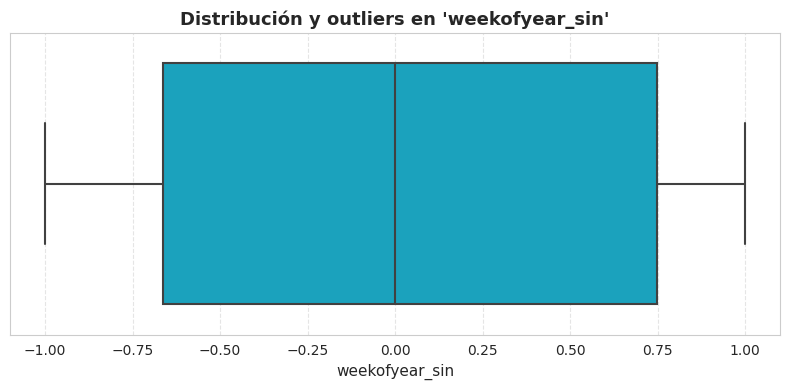

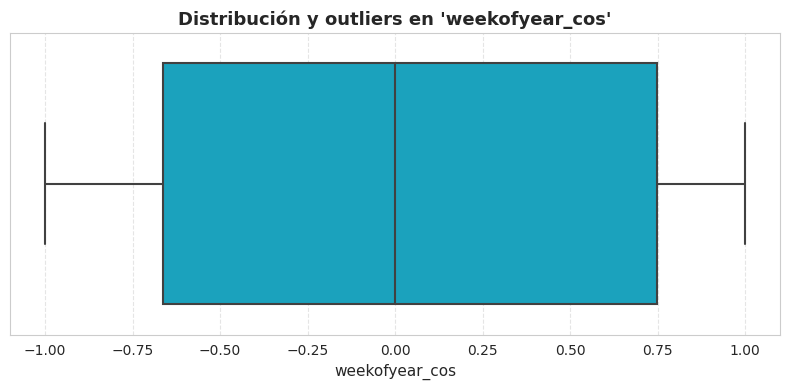

In [ ]:
# Estilo general
sns.set_style("whitegrid")
plt.rcParams.update({'axes.titlesize': 13, 'axes.labelsize': 11})

# Confirmar columnas numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Graficar boxplots con mejor diseño
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='#00b4d8', fliersize=3, linewidth=1.5)

    plt.title(f"Distribución y outliers en '{col}'", fontweight='bold')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

### 2.4. Eliminación de outliers

In [ ]:
def limpiar_outliers_interpolacion(df, col, plot=True):
    """
    Detecta outliers en la columna especificada usando el método IQR, los reemplaza
    por NaN, realiza interpolación lineal y opcionalmente muestra una gráfica.

    Parámetros:
        df (pd.DataFrame): DataFrame con índice de tiempo.
        col (str): Nombre de la columna a limpiar.
        plot (bool): Si es True, muestra la gráfica de outliers y la interpolación.

    Retorna:
        df_limpio (pd.DataFrame): DataFrame con los valores interpolados.
        n_outliers (int): Número de outliers detectados y reemplazados.
    """
    df_limpio = df.copy()

    # 1. Cálculo del rango intercuartílico (IQR)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr

    # 2. Detección y conteo de outliers
    outliers = (df[col] < lim_inf) | (df[col] > lim_sup)
    n_outliers = outliers.sum()

    # 3. Reemplazo de outliers por NaN y interpolación lineal
    df_limpio[col] = df[col].where(~outliers, np.nan)
    df_limpio[col] = df_limpio[col].interpolate(method='linear')

    # 4. Visualización
    if plot:
        sns.set(style='whitegrid')
        df_plot = pd.DataFrame({
            'Tiempo': df.index,
            'Original': df[col],
            'Interpolado': df_limpio[col],
            'Es_outlier': outliers
        })

        plt.figure(figsize=(14, 5))
        sns.lineplot(data=df_plot, x='Tiempo', y='Original', label='Original', alpha=0.6)
        sns.lineplot(data=df_plot, x='Tiempo', y='Interpolado', label='Interpolado', linestyle='--')
        plt.scatter(
            df_plot.loc[df_plot['Es_outlier'], 'Tiempo'],
            df_plot.loc[df_plot['Es_outlier'], 'Interpolado'],
            color='red', label='Valores interpolados', s=20, zorder=5
        )

        plt.title(f'Interpolación de Outliers en {col}', fontsize=14)
        plt.xlabel('Tiempo')
        plt.ylabel(f'Valor de {col}')
        plt.legend()
        plt.tight_layout()
        plt.show()

    print(f"Se detectaron y reemplazaron {n_outliers} outliers en la columna '{col}'.")
    return df_limpio, int(n_outliers)

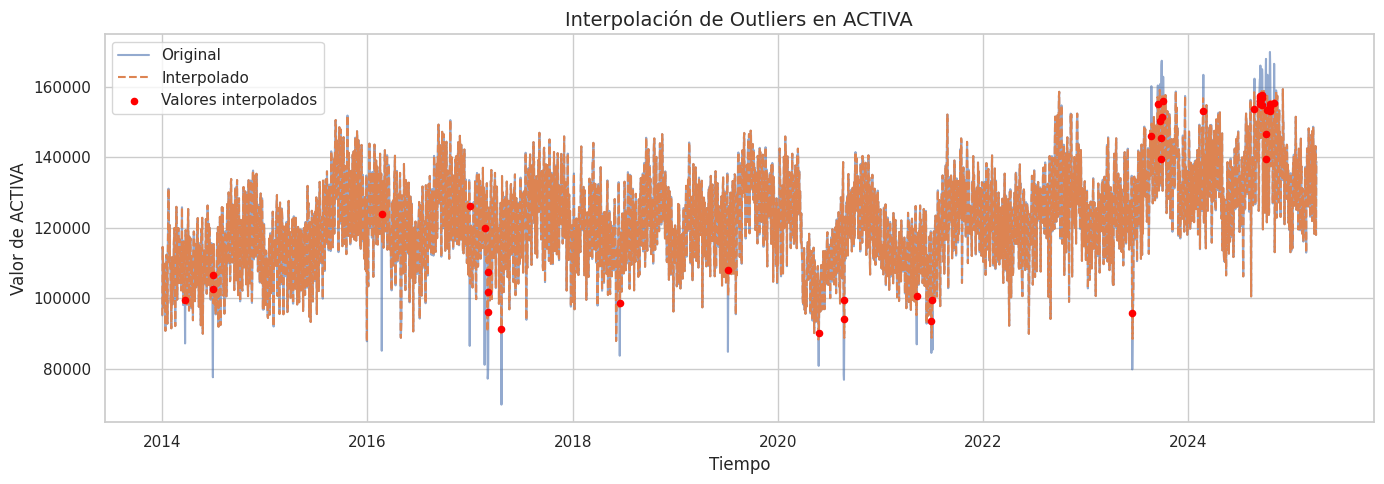

Se detectaron y reemplazaron 42 outliers en la columna 'ACTIVA'.
Total de outliers procesados: 42


In [ ]:
df_limpio, total_outliers = limpiar_outliers_interpolacion(df, 'ACTIVA', plot=True)
print(f"Total de outliers procesados: {total_outliers}")

In [ ]:
# Asignar df_corr que es el df corregido con los outliers corregidos a la variable df
df = df_corr

# **3. Visualización de la serie de tiempo**


### 3.1. Tendencia y estacionalidad


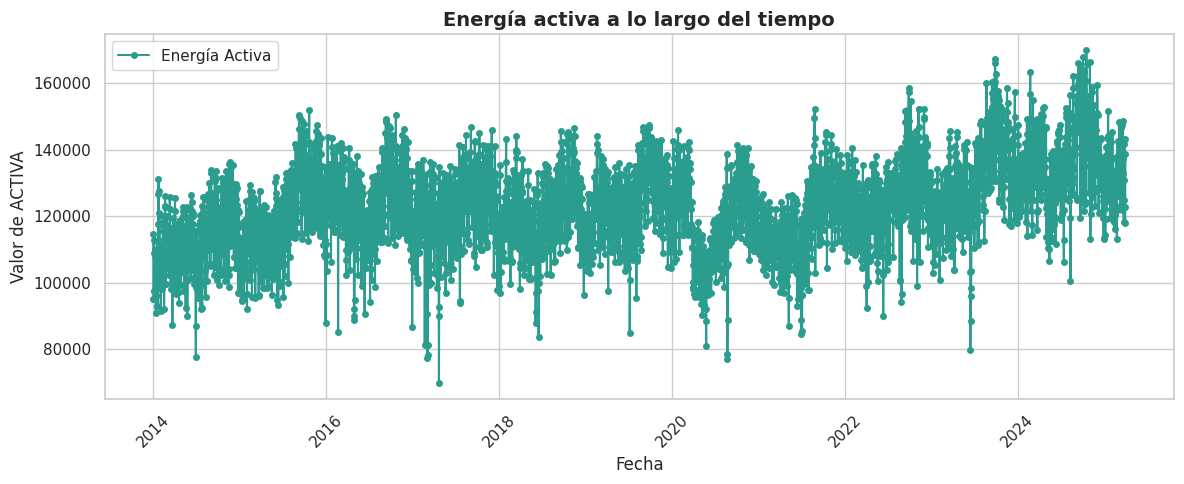

In [ ]:
# Establecer estilo
sns.set_style("whitegrid")

# Crear figura
plt.figure(figsize=(12, 5))

# Graficar la serie con estilo personalizado
plt.plot(df.index, df['ACTIVA'], color='#2a9d8f', linestyle='-', marker='o', markersize=4, label='Energía Activa')

# Personalización del título y ejes
plt.title('Energía activa a lo largo del tiempo', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor de ACTIVA', fontsize=12)
plt.xticks(rotation=45)

# Mostrar leyenda si deseas incluir más series luego
plt.legend()

# Ajuste final
plt.tight_layout()
plt.show()

Descomposición clásica (descompone la serie temporal ACTIVA en tres componentes:

*   Tendencia (trend)
*   Estacionalidad (seasonal)
*   Residuo (resid)

Indica que hay una estacionalidad anual (importante si los datos son diarios y esperas un patrón cada año).

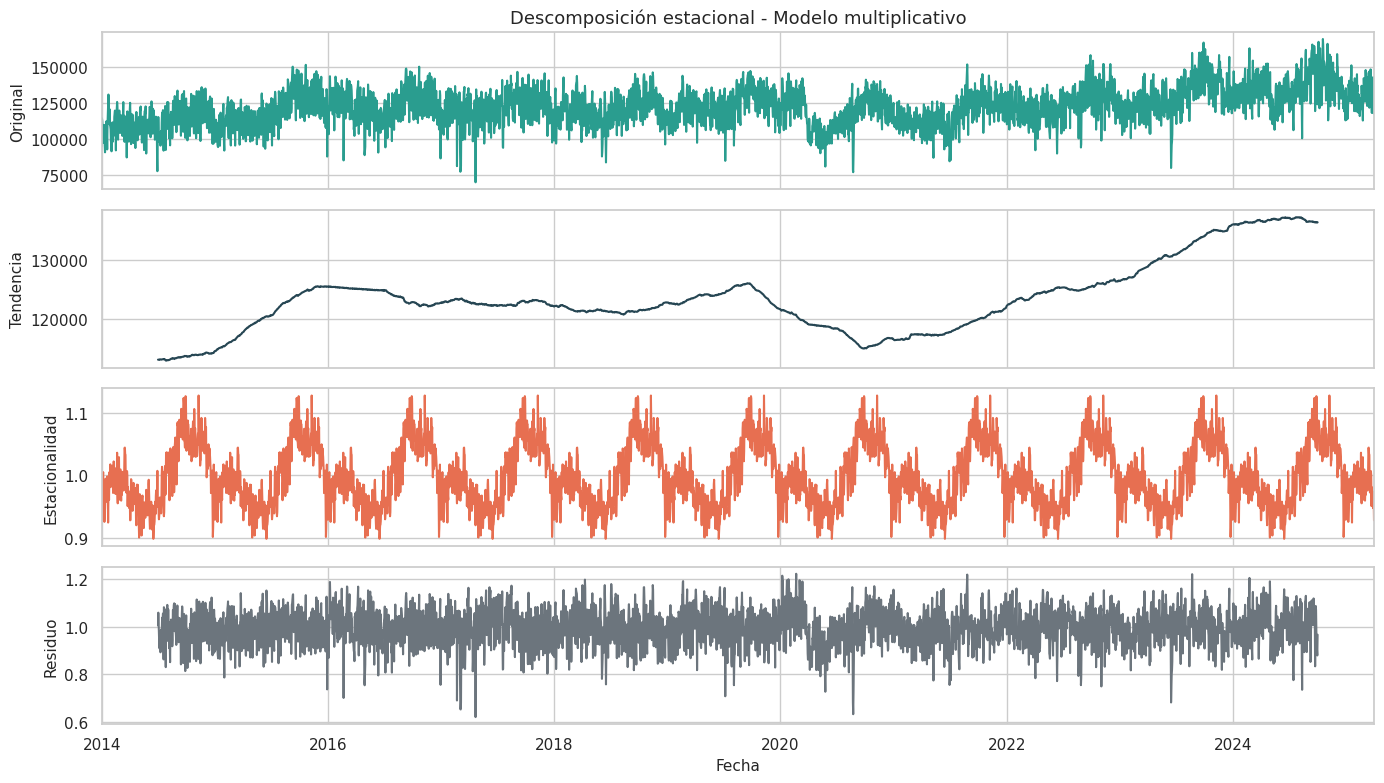

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Aplicar descomposición estacional
result = seasonal_decompose(df['ACTIVA'], model='multiplicative', period=365)

# Aplicar estilo seaborn
sns.set_style("whitegrid")
plt.rcParams.update({'axes.titlesize': 13, 'axes.labelsize': 11})

# Crear figura personalizada
fig, axes = plt.subplots(4, 1, figsize=(14, 8), sharex=True)

# Colores personalizados
colors = {
    'observed': '#2a9d8f',
    'trend': '#264653',
    'seasonal': '#e76f51',
    'resid': '#6c757d'
}

# Graficar cada componente con estilos consistentes
result.observed.plot(ax=axes[0], color=colors['observed'])
axes[0].set_ylabel("Original")
axes[0].set_title("Descomposición estacional - Modelo multiplicativo")

result.trend.plot(ax=axes[1], color=colors['trend'])
axes[1].set_ylabel("Tendencia")

result.seasonal.plot(ax=axes[2], color=colors['seasonal'])
axes[2].set_ylabel("Estacionalidad")

result.resid.plot(ax=axes[3], color=colors['resid'])
axes[3].set_ylabel("Residuo")
axes[3].set_xlabel("Fecha")

plt.tight_layout()
plt.show()


Pruebas de estacionariedad(si es menor a 0.05 es estacionaria)


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['ACTIVA'])
print('ADF statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF statistic: -4.324863579555969
p-value: 0.00040217576307197497


# **4. Entrenamiento del modelo**

In [ ]:
#importacion de librerias
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4108 entries, 2014-01-01 to 2025-03-31
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ACTIVA               4108 non-null   float64
 1   REACTIVA             4108 non-null   float64
 2   FP                   4108 non-null   float64
 3   CLRSKY_SFC_SW_DWN    4108 non-null   float64
 4   ALLSKY_SFC_SW_DWN    4108 non-null   float64
 5   T2M                  4108 non-null   float64
 6   QV2M                 4108 non-null   float64
 7   PRECTOTCORR          4108 non-null   float64
 8   PS                   4108 non-null   float64
 9   WS10M                4108 non-null   float64
 10  WS50M                4108 non-null   float64
 11  WS2M                 4108 non-null   float64
 12  ALLSKY_SFC_UVA       4108 non-null   float64
 13  ALLSKY_SFC_UVB       4108 non-null   float64
 14  ALLSKY_SFC_UV_INDEX  4108 non-null   float64
 15  ALLSKY_KT           

### 4.1. Selección de variables

In [ ]:
# Selección de variables
target = 'ACTIVA'
features = [
    'ACTIVA',
    'month_sin', 'month_cos',
    'dayofyear_sin', 'dayofyear_cos',
    'weekday_sin', 'weekday_cos',
    'weekofyear_sin', 'weekofyear_cos',
    'REACTIVA',
    'ALLSKY_SFC_SW_DWN',
    'T2M',
]

data = df[features].values
i_obj = features.index(target)

### 4.2. Creación de ventanas, división y escalado de datos

In [ ]:
# Crear secuencias sin escalar
def crear_secuencias(data, ventana, i_obj):
    X, y = [], []
    for i in range(len(data) - ventana):
        X.append(data[i:i+ventana])
        y.append(data[i+ventana, i_obj])
    return np.array(X), np.array(y)

window_size = 15
X_raw, y_raw = crear_secuencias(data, window_size, i_obj)

# Dividid datos sin escalar
split_index = int(len(X_raw) * 0.8)
X_train_raw, X_test_raw = X_raw[:split_index], X_raw[split_index:]
y_train_raw, y_test_raw = y_raw[:split_index], y_raw[split_index:]

# Escalar X
scaler_X = MinMaxScaler()
X_train_2d = X_train_raw.reshape(-1, X_train_raw.shape[2])
scaler_X.fit(X_train_2d)

X_train = scaler_X.transform(X_train_2d).reshape(X_train_raw.shape)
X_test = scaler_X.transform(X_test_raw.reshape(-1, X_test_raw.shape[2])).reshape(X_test_raw.shape)

# Escalar y
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train_raw.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test_raw.reshape(-1, 1)).flatten()

### 4.3. Modelos

### 4.3.1. Modelo LSTM

In [ ]:
# 1. Busqueda de hiperparámetros
param_grid = {
    'units': [32, 64],
    'dropout': [0.2, 0.3],
    'batch_size': [32],
    'learning_rate': [0.001],
    'epochs': [50]
}

results = []
input_shape = (X_train.shape[1], X_train.shape[2])

# 2. Entrenamiento del modelo con los hiperparámetros
for params in ParameterGrid(param_grid):
    model = Sequential()
    model.add(LSTM(params['units'], input_shape=input_shape))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stop],
        verbose=1
    )

    val_mae = min(history.history['val_mae'])
    results.append({
        'params': params,
        'val_mae': val_mae,
        'val_loss': min(history.history['val_loss']),
        'epochs_ran': len(history.history['val_mae']),
        'history': history.history
    })

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0308 - mae: 0.1393 - val_loss: 0.0236 - val_mae: 0.1271
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0158 - mae: 0.1009 - val_loss: 0.0257 - val_mae: 0.1347
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0137 - mae: 0.0919 - val_loss: 0.0170 - val_mae: 0.1066
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0134 - mae: 0.0916 - val_loss: 0.0187 - val_mae: 0.1122
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0131 - mae: 0.0913 - val_loss: 0.0180 - val_mae: 0.1107
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0119 - mae: 0.0853 - val_loss: 0.0153 - val_mae: 0.1007
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0122 - mae: 0.0877 - val_loss: 0.0138 - val_mae: 0.0951
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - mae: 0.0836 - val_loss: 0.0105 - val_mae: 0.0816
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.01

In [ ]:
# 3. Mostrar mejores resultados
# Convertir los resultados a DataFrame y ordenarlos por MAE en validación (menor es mejor)
results_df = pd.DataFrame(results).sort_values(by='val_mae')

# Seleccionar la mejor configuración (primer fila del DataFrame ordenado)
best_model = results_df.iloc[0]

# Mostrar la mejor combinación de hiperparámetros y su desempeño
print("\n✅ Mejor configuración encontrada:")
print(best_model['params'])
print(f"📉 MAE de validación: {best_model['val_mae']:.4f}")



✅ Mejor configuración encontrada:
{'batch_size': 32, 'dropout': 0.2, 'epochs': 50, 'learning_rate': 0.001, 'units': 32}
📉 MAE de validación: 0.0737


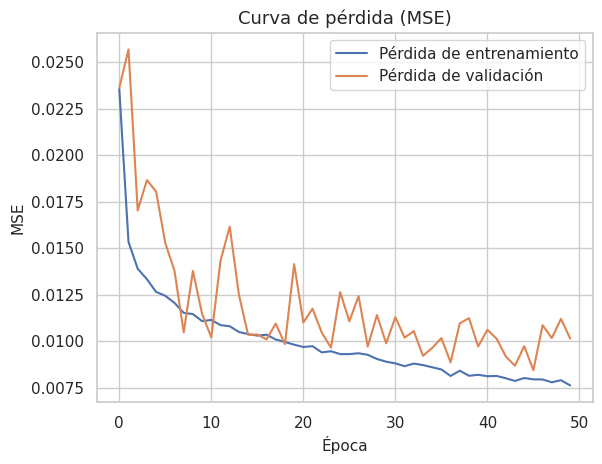

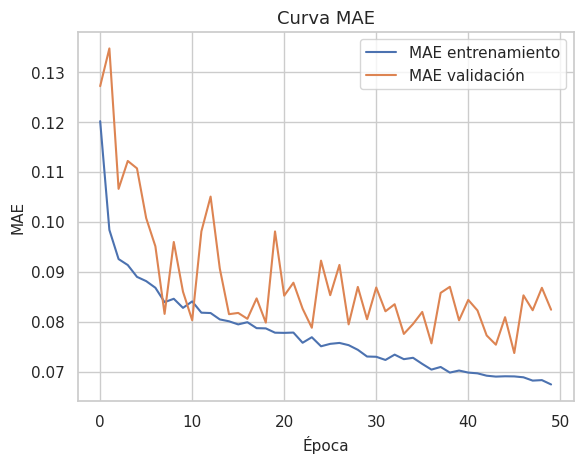

In [ ]:
# 4. Curvas de entrenamiento
# Curva de pérdida (MSE) durante el entrenamiento y validación
plt.plot(best_model['history']['loss'], label='Pérdida de entrenamiento')
plt.plot(best_model['history']['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Curva de pérdida (MSE)')
plt.grid(True)
plt.legend()
plt.show()

# Curva de MAE durante el entrenamiento y validación
plt.plot(best_model['history']['mae'], label='MAE entrenamiento')
plt.plot(best_model['history']['val_mae'], label='MAE validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('Curva MAE')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# 5. Reentrenar con todos los datos

# Extraer la mejor configuración encontrada previamente
mejores_params = best_model['params']

# Definición del modelo final con los mejores hiperparámetros
model_final = Sequential()
model_final.add(LSTM(mejores_params['units'], input_shape=(X_raw.shape[1], X_raw.shape[2])))
model_final.add(Dropout(mejores_params['dropout']))
model_final.add(Dense(1, activation='linear'))

# Compilación con la mejor tasa de aprendizaje
optimizer = Adam(learning_rate=mejores_params['learning_rate'])
model_final.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Escalado de todos los datos disponibles
X_all = scaler_X.transform(X_raw.reshape(-1, X_raw.shape[2])).reshape(X_raw.shape)
y_all = scaler_y.transform(y_raw.reshape(-1, 1)).flatten()

# Entrenamiento final del modelo con EarlyStopping sobre la pérdida de entrenamiento
history = model_final.fit(
    X_all, y_all,
    epochs=mejores_params['epochs'],
    batch_size=mejores_params['batch_size'],
    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)],
    verbose=0
)

print("Modelo reentrenado con todos los datos")

Modelo reentrenado con todos los datos


In [ ]:
# 6. Evaluación sobre test

# Predicción en el conjunto de prueba
y_pred_scaled = model.predict(X_test).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Métricas finales
mae = mean_absolute_error(y_true_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
r2 = r2_score(y_true_inv, y_pred_inv)

print("\n📉 MÉTRICAS PARA ACTIVA (predicción directa)")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

📉 MÉTRICAS PARA ACTIVA (predicción directa)
MAE  : 7106.07
RMSE : 8932.27
R²   : 0.5409


### 4.3.2. Modelo GRU

In [ ]:
# 1. Busqueda de hiperparámetros
param_grid = {
    'units': [32, 64],
    'dropout': [0.2, 0.3],
    'batch_size': [32],
    'learning_rate': [0.001],
    'epochs': [50]
}

results = []
input_shape = (X_train.shape[1], X_train.shape[2])

# 2. Entrenamiento del modelo con los hiperparámetros
for params in ParameterGrid(param_grid):
    model = Sequential()
    model.add(GRU(params['units'], input_shape=input_shape))
    model.add(Dropout(params['dropout']))
    model.add(Dense(1, activation='linear'))

    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        callbacks=[early_stop],
        verbose=1
    )

    val_mae = min(history.history['val_mae'])
    results.append({
        'params': params,
        'val_mae': val_mae,
        'val_loss': min(history.history['val_loss']),
        'epochs_ran': len(history.history['val_mae']),
        'history': history.history
    })

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.3572 - mae: 0.4517 - val_loss: 0.0365 - val_mae: 0.1588
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0310 - mae: 0.1399 - val_loss: 0.0295 - val_mae: 0.1439
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0249 - mae: 0.1233 - val_loss: 0.0285 - val_mae: 0.1425
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0193 - mae: 0.1104 - val_loss: 0.0264 - val_mae: 0.1372
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mae: 0.1043 - val_loss: 0.0262 - val_mae: 0.1370
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0168 - mae: 0.1009 - val_loss: 0.0215 - val_mae: 0.1223
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0160 - mae: 0.0997 - val_loss: 0.0193 - val_mae: 0.1147
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0144 - mae: 0.0944 - val_loss: 0.0201 - val_mae: 0.1180
Epoch 9/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0

In [ ]:
# 3. Mostrar mejores resultados
# Convertir los resultados a DataFrame y ordenarlos por MAE en validación (menor es mejor)
results_df = pd.DataFrame(results).sort_values(by='val_mae')

# Seleccionar la mejor configuración (primer fila del DataFrame ordenado)
best_model = results_df.iloc[0]

# Mostrar la mejor combinación de hiperparámetros y su desempeño
print("\n✅ Mejor configuración encontrada:")
print(best_model['params'])
print(f"📉 MAE de validación: {best_model['val_mae']:.4f}")



✅ Mejor configuración encontrada:
{'batch_size': 32, 'dropout': 0.2, 'epochs': 50, 'learning_rate': 0.001, 'units': 64}
📉 MAE de validación: 0.0694


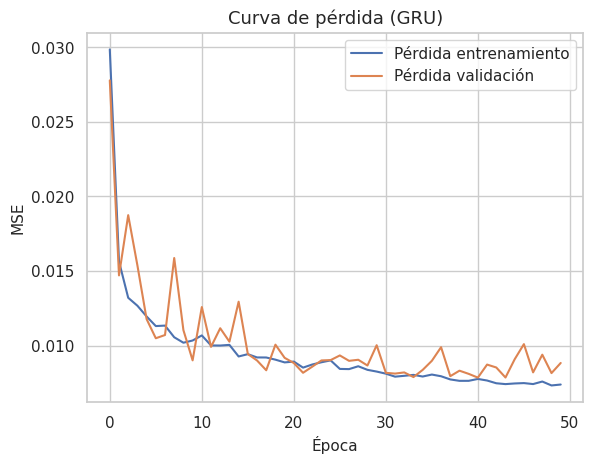

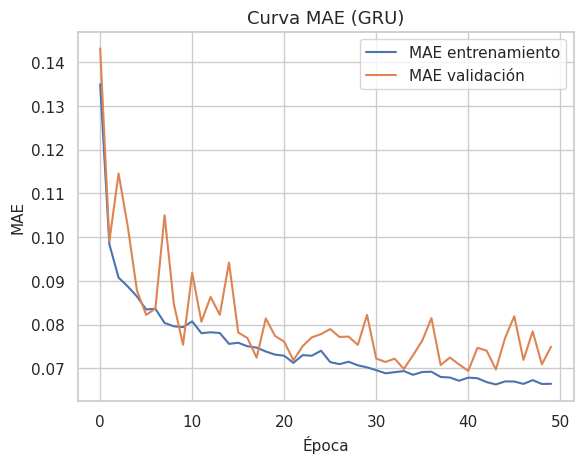

In [ ]:
# 4. Curvas de entrenamiento
# Curva de pérdida (MSE) durante el entrenamiento y validación
plt.plot(best_model['history']['loss'], label='Pérdida entrenamiento')
plt.plot(best_model['history']['val_loss'], label='Pérdida validación')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.title('Curva de pérdida (GRU)')
plt.grid(True)
plt.legend()
plt.show()

# Curva de MAE durante el entrenamiento y validación
plt.plot(best_model['history']['mae'], label='MAE entrenamiento')
plt.plot(best_model['history']['val_mae'], label='MAE validación')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.title('Curva MAE (GRU)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# 5. Reentrenar con todos los datos

# Extraer la mejor configuración encontrada previamente
mejores_params = best_model['params']

# Definición del modelo final con los mejores hiperparámetros
model_final = Sequential()
model_final.add(GRU(mejores_params['units'], input_shape=(X_raw.shape[1], X_raw.shape[2])))
model_final.add(Dropout(mejores_params['dropout']))
model_final.add(Dense(1, activation='linear'))

# Compilación con la mejor tasa de aprendizaje
optimizer = Adam(learning_rate=mejores_params['learning_rate'])
model_final.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Escalado de todos los datos disponibles
X_all = scaler_X.transform(X_raw.reshape(-1, X_raw.shape[2])).reshape(X_raw.shape)
y_all = scaler_y.transform(y_raw.reshape(-1, 1)).flatten()

# Entrenamiento final del modelo con EarlyStopping sobre la pérdida de entrenamiento
history = model_final.fit(
    X_all, y_all,
    epochs=mejores_params['epochs'],
    batch_size=mejores_params['batch_size'],
    callbacks=[EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)],
    verbose=0
)

print("Modelo reentrenado con todos los datos")

Modelo reentrenado con todos los datos


In [ ]:
# 6. Evaluación sobre test

# Predicción en el conjunto de prueba
y_pred_scaled = model_final.predict(X_test).flatten()
y_pred_inv = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Métricas finales
mae = mean_absolute_error(y_true_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
r2 = r2_score(y_true_inv, y_pred_inv)

print("\n📉 MÉTRICAS PARA ACTIVA (predicción directa)")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

📉 MÉTRICAS PARA ACTIVA (predicción directa)
MAE  : 5876.67
RMSE : 7615.60
R²   : 0.6663


# **5. Autoregresión**

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def predict_future_autoregressive(model,
                                  initial_input_sequence_scaled,
                                  num_prediction_steps,
                                  scaler,
                                  features_df,
                                  target_feature_name='ACTIVA',
                                  features_list=None):
    # (aquí copias la función tal cual la tienes)
    if features_list is None:
        raise ValueError("Debe proporcionarse 'features_list'.")

    original_order = features_list
    tgt_idx = original_order.index(target_feature_name)
    idx_map = {feat: i for i, feat in enumerate(original_order)}
    data_min = scaler.data_min_
    data_range = scaler.data_range_

    current_input = initial_input_sequence_scaled.copy()
    last_unscaled = scaler.inverse_transform(current_input[0, -1].reshape(1, -1))[0]
    last_date = features_df.index[-1]

    future_scaled = []
    for i in range(num_prediction_steps):
        pred_scaled = model.predict(current_input, verbose=0)[0, 0]
        future_scaled.append(pred_scaled)

        # desescala sólo el target
        unscaled_target = pred_scaled * data_range[tgt_idx] + data_min[tgt_idx]

        date = last_date + timedelta(days=i + 1)
        month = date.month; doy = date.timetuple().tm_yday
        weekday = date.weekday(); woy = date.isocalendar().week

        # calcula sinusoidales
        cyc = {
            'month_sin': np.sin(2*np.pi*month/12),
            'month_cos': np.cos(2*np.pi*month/12),
            'dayofyear_sin': np.sin(2*np.pi*doy/365),
            'dayofyear_cos': np.cos(2*np.pi*doy/365),
            'weekday_sin': np.sin(2*np.pi*weekday/7),
            'weekday_cos': np.cos(2*np.pi*weekday/7),
            'weekofyear_sin': np.sin(2*np.pi*woy/52),
            'weekofyear_cos': np.cos(2*np.pi*woy/52),
        }

        new_unscaled = last_unscaled.copy()
        new_unscaled[tgt_idx] = unscaled_target
        # actualiza fecha y cíclicas
        for feat, val in [
            ('year', date.year), ('month', month), ('dayofyear', doy),
            ('weekday', weekday), ('weekofyear', woy),
        ] + list(cyc.items()):
            if feat in idx_map:
                new_unscaled[idx_map[feat]] = val

        new_scaled = scaler.transform(new_unscaled.reshape(1, -1))[0]
        current_input = np.concatenate(
            [current_input[:, 1:, :], new_scaled.reshape(1,1,-1)],
            axis=1
        )
        last_unscaled = new_unscaled

    future_unscaled = np.array(future_scaled) * data_range[tgt_idx] + data_min[tgt_idx]
    future_dates = [last_date + timedelta(days=i + 1) for i in range(num_prediction_steps)]
    return pd.Series(future_unscaled, index=future_dates)

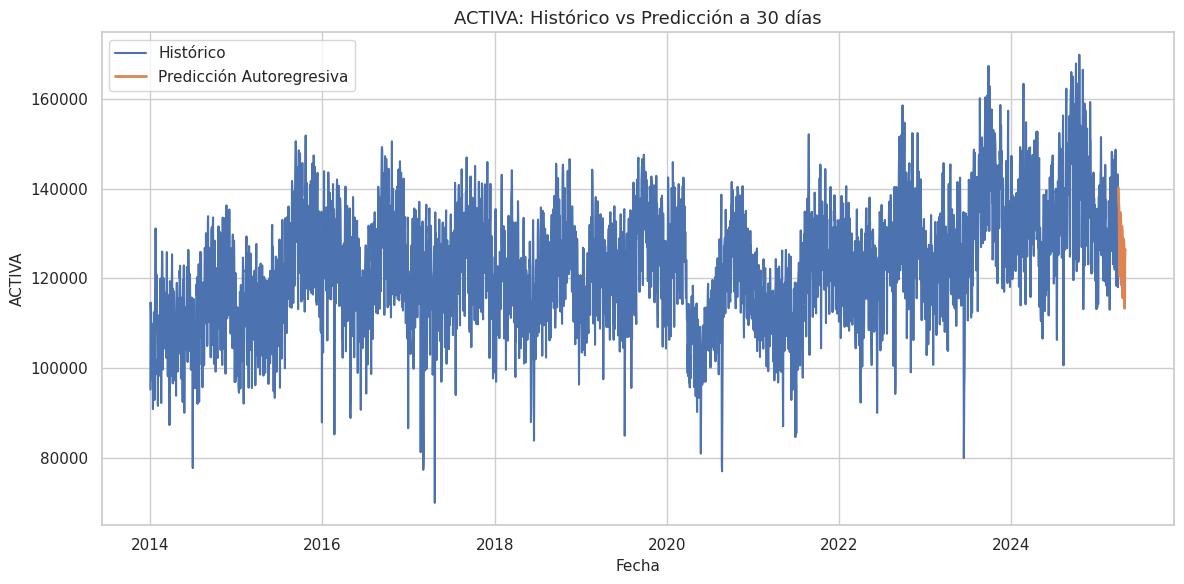

In [ ]:
# 1) Definir tus parámetros
features = [
    'ACTIVA',
    'month_sin', 'month_cos',
    'dayofyear_sin', 'dayofyear_cos',
    'weekday_sin', 'weekday_cos',
    'weekofyear_sin', 'weekofyear_cos',
    'REACTIVA',
    'ALLSKY_SFC_SW_DWN',
    'T2M',
]
window_size = 15           # tamaño de la ventana de entrada
num_future_steps = 30      # cuántos días en el futuro predecir
target = 'ACTIVA'          # nombre de la columna objetivo

# 2) Ajustar el MinMaxScaler sobre todo el histórico
scaler = MinMaxScaler()
scaler.fit(df[features].values)


# 3) Preparar la secuencia inicial escalada
# Extrae las últimas `window_size` filas de tus features
last_seq = df[features].iloc[-window_size:].values         # shape: (window_size, n_features)
initial_input_sequence_scaled = (
    scaler
      .transform(last_seq)
      .reshape(1, window_size, len(features))              # shape: (1, window_size, n_features)
)

# 4) Llamar a la predicción autoregresiva
preds = predict_future_autoregressive(
    model=model_final,
    initial_input_sequence_scaled=initial_input_sequence_scaled,
    num_prediction_steps=num_future_steps,
    scaler=scaler,
    features_df=df,
    target_feature_name=target,
    features_list=features
)

# `preds` es un pd.Series indexado por fechas futuras, con los valores desescalados.

# 5) Graficar histórico vs predicción futura
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[target], label='Histórico')
plt.plot(preds.index, preds.values,
         label='Predicción Autoregresiva', linewidth=2)
plt.title(f'{target}: Histórico vs Predicción a {num_future_steps} días')
plt.xlabel('Fecha')
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

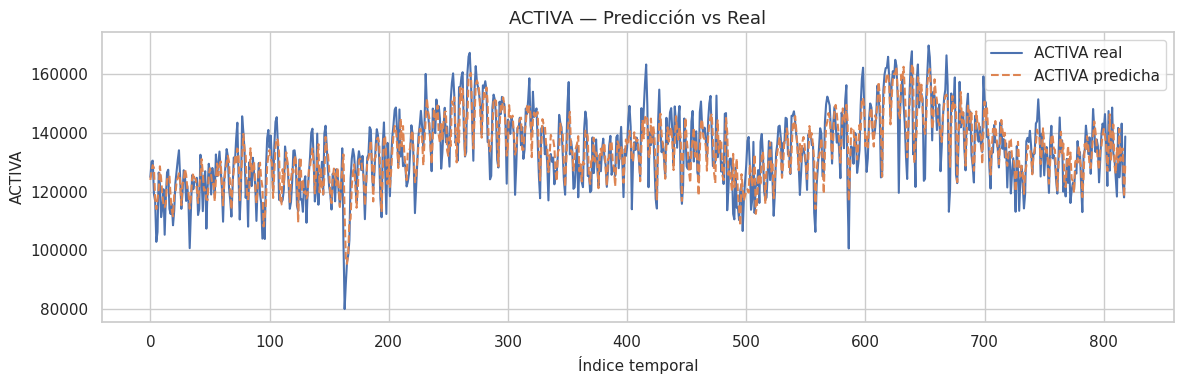

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_true_inv, label='ACTIVA real')
plt.plot(y_pred_inv, '--', label='ACTIVA predicha')
plt.title('ACTIVA — Predicción vs Real')
plt.xlabel('Índice temporal')
plt.ylabel('ACTIVA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# **6. Interfaz**

In [ ]:
"""
Interfaz de Usuario para Simulación de Demanda, Generación Solar y Cálculos Ambientales/Económicos.
Integración del modelo LSTM y cálculos de escenarios solares.
"""

# --- Importaciones Necesarias ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# --- 1. Parámetros del Modelo Solar y Económico (Valores por defecto para la UI) ---
# Estos serán ajustables en la interfaz
DEFAULT_H = 4.5  # Radiación solar media diaria (kWh/m²/día) para Leticia
DEFAULT_PR = 0.80  # Performance Ratio o factor de rendimiento del sistema (0.7-0.9)
KWH_POR_LITRO_DIESEL = 3.0   # kWh generados por 1 litro de diésel
CO2_POR_LITRO_DIESEL = 2.20  # kg CO2 emitidos por 1 litro de diésel
PRECIO_DIESEL_COP = 2553.59  # Precio promedio del diésel en COP/litro

# --- 3. Escenarios de Potencia Nominal (Pr en kW) ---

ESCENARIOS_PR = {
    "Pequeña (100 kW)": 100,
    "Mediana (1 MW)": 1000,
    "Grande (5 MW)": 5000
}

# --- 4. Funciones de Cálculo ---

def calcular_energia_solar(Pr_kw, H_kwh_m2_dia, PR_ratio):
    """
    Calcula la energía solar generada diariamente.
    E = Pr * H * PR
    E: Energía generada (kWh/día)
    Pr: Potencia nominal del sistema (kW)
    H: Radiación solar media diaria (kWh/m²/día)
    PR: Performance Ratio (adimensional)
    """
    return Pr_kw * H_kwh_m2_dia * PR_ratio

def calcular_ahorro_diesel_y_co2(energia_solar_kwh_dia, demanda_kwh_dia_arr, KWH_POR_LITRO_DIESEL, CO2_POR_LITRO_DIESEL, PRECIO_DIESEL_COP):
    """
    Calcula el diésel ahorrado y la reducción de CO2 diariamente para una serie de demanda.
    Asume que la energía solar desplaza la generación diésel hasta cubrir la demanda.
    """
    # Energia solar generada por día, asumiendo constante durante el plazo para cada escenario
    energia_solar_generada_diaria = energia_solar_kwh_dia # Esto es un valor constante para un Pr_kw dado

    energia_solar_utilizada_arr = np.minimum(energia_solar_generada_diaria, demanda_kwh_dia_arr)

    litros_diesel_ahorrados_arr = energia_solar_utilizada_arr / KWH_POR_LITRO_DIESEL
    ahorro_economico_cop_arr = litros_diesel_ahorrados_arr * PRECIO_DIESEL_COP
    reduccion_co2_kg_arr = litros_diesel_ahorrados_arr * CO2_POR_LITRO_DIESEL

    # CORRECCIÓN: Usar energia_solar_utilizada_arr.sum() en lugar de energia_solar_utilizada_total.sum()
    return litros_diesel_ahorrados_arr.sum(), ahorro_economico_cop_arr.sum(), reduccion_co2_kg_arr.sum(), energia_solar_utilizada_arr.sum()


# --- 5. Función Principal de Simulación para la UI ---

def run_simulation(h_solar, pr_ratio, plazo_seleccionado,
                     escenario_pequena, escenario_mediana, escenario_grande,
                     kwh_por_litro_diesel_val, co2_por_litro_diesel_val, precio_diesel_cop_val):

    with output_area: # Asegurarse de que la salida se muestre en el área designada
        clear_output(wait=True) # Limpiar la salida anterior

        # Determinar el número de días para la predicción según el plazo seleccionado
        num_dias_prediccion = {
            "Corto Plazo (7 días)": 7,
            "Mediano Plazo (15 días)": 15,
            "Largo Plazo (30 días)": 30
        }[plazo_seleccionado]

        # --- Usar la Demanda Predicha de tu Modelo LSTM ---
        demanda_predicha_serie = future_demands_predicted.iloc[:num_dias_prediccion].copy()
        demanda_predicha_array = demanda_predicha_serie.values # Para los cálculos que esperan un array
        demanda_fechas = demanda_predicha_serie.index # Usar el índice de fechas real de la predicción

        # Crear un DataFrame para la demanda predicha con las fechas reales
        df_demanda_predicha = pd.DataFrame({
            'Fecha': demanda_fechas,
            'Dia': np.arange(1, num_dias_prediccion + 1), # Se mantiene para consistencia en algunos gráficos
            'Demanda_kWh': demanda_predicha_array
        })

        # --- Simulación y Recopilación de Resultados ---
        resumen_escenarios = []
        df_todos_resultados = pd.DataFrame() # Para el gráfico de líneas

        escenarios_activos = {}
        if escenario_pequena:
            escenarios_activos["Pequeña (100 kW)"] = ESCENARIOS_PR["Pequeña (100 kW)"]
        if escenario_mediana:
            escenarios_activos["Mediana (1 MW)"] = ESCENARIOS_PR["Mediana (1 MW)"]
        if escenario_grande:
            escenarios_activos["Grande (5 MW)"] = ESCENARIOS_PR["Grande (5 MW)"]

        if not escenarios_activos:
            print("Por favor, selecciona al menos un escenario solar para simular.")
            return

        for nombre_escenario, pr_kw in escenarios_activos.items():
            energia_solar_generacion_diaria = calcular_energia_solar(pr_kw, h_solar, pr_ratio)

            litros, ahorro, co2, energia_solar_utilizada_total_para_escenario = calcular_ahorro_diesel_y_co2( # Cambiado el nombre de la variable de retorno
                energia_solar_generacion_diaria, # Es un valor único para la capacidad actual
                demanda_predicha_array, # Es el array de la demanda predicha del LSTM
                kwh_por_litro_diesel_val,
                co2_por_litro_diesel_val,
                precio_diesel_cop_val
            )

            total_demanda_kwh = demanda_predicha_array.sum()
            capacidad_satisfaccion_demanda_pct = (energia_solar_utilizada_total_para_escenario / total_demanda_kwh) * 100 if total_demanda_kwh > 0 else 0

            resumen_escenarios.append({
                'Escenario': nombre_escenario,
                'Plazo': plazo_seleccionado,
                'Demanda Total Predicha (kWh)': total_demanda_kwh,
                'Generacion Solar Total (kWh)': energia_solar_generacion_diaria * num_dias_prediccion,
                'Capacidad Satisfaccion Demanda (%)': capacidad_satisfaccion_demanda_pct,
                'Litros Diésel Ahorrados': litros,
                'Ahorro Económico (COP)': ahorro,
                'Reduccion CO2 (kg)': co2
            })

            # Preparar datos para el gráfico de líneas (Demanda vs Generación Solar)
            df_temp = df_demanda_predicha.copy() # Copia del DataFrame de demanda predicha (con fechas)
            df_temp['Generacion_Solar_kWh'] = energia_solar_generacion_diaria
            df_temp['Escenario'] = nombre_escenario
            df_todos_resultados = pd.concat([df_todos_resultados, df_temp], ignore_index=True)


        df_resumen = pd.DataFrame(resumen_escenarios)

        # --- Presentación de la Tabla Resumen ---
        print("\n--- Tabla Resumen de Resultados por Escenario y Plazo ---")
        df_resumen_display = df_resumen.copy()
        df_resumen_display['Demanda Total Predicha (kWh)'] = df_resumen_display['Demanda Total Predicha (kWh)'].map('{:,.0f}'.format)
        df_resumen_display['Generacion Solar Total (kWh)'] = df_resumen_display['Generacion Solar Total (kWh)'].map('{:,.0f}'.format)
        df_resumen_display['Capacidad Satisfaccion Demanda (%)'] = df_resumen_display['Capacidad Satisfaccion Demanda (%)'].map('{:.2f}%'.format)
        df_resumen_display['Litros Diésel Ahorrados'] = df_resumen_display['Litros Diésel Ahorrados'].map('{:,.0f}'.format)
        df_resumen_display['Ahorro Económico (COP)'] = df_resumen_display['Ahorro Económico (COP)'].map('COP ${:,.0f}'.format)
        df_resumen_display['Reduccion CO2 (kg)'] = df_resumen_display['Reduccion CO2 (kg)'].map('{:,.0f}'.format)
        print(df_resumen_display.to_string(index=False))

        # --- Visualización de Resultados (Gráficos) ---
        sns.set_style("whitegrid")
        plt.rcParams['figure.dpi'] = 100

        # Gráfico 1: Demanda Predicha vs. Generación Solar Diaria
        fig1, ax1 = plt.subplots(figsize=(14, 7))

        # Graficar la Demanda Predicha (ahora con fechas reales)
        sns.lineplot(x='Fecha', y='Demanda_kWh', data=df_demanda_predicha, ax=ax1,
                     label='Demanda Predicha (kWh/día)', color='blue', marker='o', linestyle='--', linewidth=2)

        # Añadir etiquetas a cada SEGUNDO punto de la línea de Demanda Predicha
        for i, (x, y) in enumerate(zip(df_demanda_predicha['Fecha'], df_demanda_predicha['Demanda_kWh'])):
            if i % 2 == 0:
                ax1.text(x, y + 2000, f'{y:,.0f}',
                         color='white', backgroundcolor='black', fontsize=8, ha='center', va='bottom')

        # Graficar la Generación Solar para los escenarios activos
        line_plots = sns.lineplot(x='Fecha', y='Generacion_Solar_kWh', hue='Escenario', data=df_todos_resultados, ax=ax1,
                                  marker='x', linestyle='-', linewidth=2, palette='tab10')

        # Añadir etiquetas de datos SÓLO al primer punto (Fecha 1) de cada línea de Generación Solar
        for i, (nombre_escenario, pr_kw) in enumerate(escenarios_activos.items()):
            data_first_date = df_todos_resultados[(df_todos_resultados['Escenario'] == nombre_escenario) & (df_todos_resultados['Fecha'] == df_todos_resultados['Fecha'].min())]
            if not data_first_date.empty:
                x_val = data_first_date['Fecha'].iloc[0]
                y_val = data_first_date['Generacion_Solar_kWh'].iloc[0]

                # Ajuste en la posición vertical de las etiquetas de generación solar
                # Basado en la cantidad de escenarios activos para evitar solapamiento
                offset_map = {0: 2000, 1: -2000, 2: 4000} # Ajustar según necesidad
                offset_y = offset_map.get(i % len(escenarios_activos), 0) # Ciclar offsets

                ax1.text(x_val, y_val + offset_y, f'{y_val:,.0f}',
                         color='white', backgroundcolor='black', fontsize=8, ha='left', va='bottom')

        ax1.set_title(f'Demanda de Energía Predicha vs. Generación Solar: {plazo_seleccionado}', fontsize=16)
        ax1.set_xlabel('Fecha')
        ax1.set_ylabel('Energía (kWh/día)')
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

        handles, labels = ax1.get_legend_handles_labels()
        if 'Demanda Predicha (kWh/día)' in labels:
            idx_demanda = labels.index('Demanda Predicha (kWh/día)')
            handles.insert(0, handles.pop(idx_demanda))
            labels.insert(0, labels.pop(idx_demanda))

        ax1.legend(handles=handles, labels=labels, title='Leyenda', loc='lower right')
        ax1.grid(True)
        plt.tight_layout()
        plt.show()

        # Gráfico 2: Reducción de CO2 por Escenario (Individual, corregido)
        fig2, ax2 = plt.subplots(figsize=(12, 7))
        sns.barplot(x='Escenario', y='Reduccion CO2 (kg)', hue='Escenario', data=df_resumen, palette='viridis', ax=ax2, legend=False)
        ax2.set_title(f'Reducción Total de CO2 por Escenario ({plazo_seleccionado})', fontsize=16)
        ax2.set_xlabel('Escenario Solar')
        ax2.set_ylabel('Reducción de CO2 (kg)')
        ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

        for container in ax2.containers:
            ax2.bar_label(container, fmt='{:,.0f}', color='white', backgroundcolor='black',
                          label_type='edge', padding=3)

        plt.tight_layout()
        plt.show()

        # Gráfico 3: Ahorro Económico por Escenario (Individual, corregido)
        fig3, ax3 = plt.subplots(figsize=(12, 7))
        sns.barplot(x='Escenario', y='Ahorro Económico (COP)', hue='Escenario', data=df_resumen, palette='magma', ax=ax3, legend=False)
        ax3.set_title(f'Ahorro Económico Total por Escenario ({plazo_seleccionado})', fontsize=16)
        ax3.set_xlabel('Escenario Solar')
        ax3.set_ylabel('Ahorro Económico (COP)')
        ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'COP ${x:,.0f}'))

        for container in ax3.containers:
            ax3.bar_label(container, fmt='COP ${:,.0f}', color='white', backgroundcolor='black',
                          label_type='edge', padding=3)

        plt.tight_layout()
        plt.show()

        # --- Gráfico 4: Impacto Consolidado por Escenario (Tres subgráficos en una figura) ---
        fig4, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True) # Una fila, tres columnas
        fig4.suptitle(f'Impacto Consolidado por Escenario ({plazo_seleccionado})', fontsize=18)

        # Subplot 1: Litros de Diésel Ahorrados
        sns.barplot(x='Escenario', y='Litros Diésel Ahorrados', hue='Escenario', data=df_resumen, palette='Blues_d', ax=axes[0], legend=False)
        axes[0].set_title('Litros de Diésel Ahorrados')
        axes[0].set_ylabel('Litros')
        axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
        for container in axes[0].containers:
            axes[0].bar_label(container, fmt='{:,.0f}', color='black', backgroundcolor='white', padding=3)

        # Subplot 2: Reducción de CO2 (kg)
        sns.barplot(x='Escenario', y='Reduccion CO2 (kg)', hue='Escenario', data=df_resumen, palette='Greens_d', ax=axes[1], legend=False)
        axes[1].set_title('Reducción de CO2')
        axes[1].set_ylabel('CO2 (kg)')
        axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
        for container in axes[1].containers:
            axes[1].bar_label(container, fmt='{:,.0f}', color='black', backgroundcolor='white', padding=3)

        # Subplot 3: Ahorro Económico (COP)
        sns.barplot(x='Escenario', y='Ahorro Económico (COP)', hue='Escenario', data=df_resumen, palette='Purples_d', ax=axes[2], legend=False)
        axes[2].set_title('Ahorro Económico')
        axes[2].set_ylabel('Ahorro (COP)')
        axes[2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'COP ${x:,.0f}'))
        for container in axes[2].containers:
            axes[2].bar_label(container, fmt='COP ${:,.0f}', color='black', backgroundcolor='white', padding=3)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el título principal
        plt.show()

# Controles para Parámetros Solares y Generales
h_slider = widgets.FloatSlider(
    value=DEFAULT_H,
    min=1.0, max=8.0, step=0.1,
    description='Radiación Solar (H):',
    orientation='horizontal',
    readout=True, readout_format='.1f',
    layout=widgets.Layout(width='auto')
)

pr_slider = widgets.FloatSlider(
    value=DEFAULT_PR,
    min=0.6, max=0.95, step=0.01,
    description='Performance Ratio (PR):',
    orientation='horizontal',
    readout=True, readout_format='.2f',
    layout=widgets.Layout(width='auto')
)

# Control para el Horizonte de Predicción
plazo_dropdown = widgets.Dropdown(
    options=["Corto Plazo (7 días)", "Mediano Plazo (15 días)", "Largo Plazo (30 días)"],
    value="Corto Plazo (7 días)",
    description='Horizonte Predicción:',
    layout=widgets.Layout(width='auto')
)

# Checkboxes para seleccionar escenarios solares
escenario_pequena_cb = widgets.Checkbox(value=True, description='Pequeña (100 kW)')
escenario_mediana_cb = widgets.Checkbox(value=True, description='Mediana (1 MW)')
escenario_grande_cb = widgets.Checkbox(value=True, description='Grande (5 MW)')

# Controles para Parámetros Económicos/Ambientales
kwh_litro_diesel_text = widgets.FloatText(value=KWH_POR_LITRO_DIESEL, description='kWh/Litro Diésel:', step=0.1)
co2_litro_diesel_text = widgets.FloatText(value=CO2_POR_LITRO_DIESEL, description='CO2/Litro Diésel (kg):', step=0.01)
precio_diesel_cop_text = widgets.FloatText(value=PRECIO_DIESEL_COP, description='Precio Diésel (COP/L):', step=10.0)


# Conectar los controles con la función de simulación
output_area = widgets.Output()

# Organizar los controles en VBox y HBox
input_controls_solar = widgets.VBox([h_slider, pr_slider])
input_controls_scenarios = widgets.VBox([escenario_pequena_cb, escenario_mediana_cb, escenario_grande_cb])
input_controls_economic = widgets.VBox([kwh_litro_diesel_text, co2_litro_diesel_text, precio_diesel_cop_text])

# Títulos para las secciones de controles
title_solar = widgets.HTML("<h3>Parámetros Solares</h3>")
title_scenarios = widgets.HTML("<h3>Selección de Escenarios Solares</h3>")
title_economic = widgets.HTML("<h3>Parámetros Económicos/Ambientales</h3>")
title_horizon = widgets.HTML("<h3>Horizonte de Predicción</h3>")

# Layout general
ui = widgets.VBox([
    widgets.HTML("<h2><center>Simulador Interactivo de Impacto de Energía Solar en Leticia</center></h2>"),
    widgets.HTML("<p><center>Ajusta los parámetros y selecciona los escenarios para ver el impacto en la demanda futura, el ahorro de diésel, la reducción de CO2 y el ahorro económico.</center></p>"),
    widgets.HBox([
        widgets.VBox([title_solar, input_controls_solar], layout=widgets.Layout(width='25%')),
        widgets.VBox([title_horizon, plazo_dropdown], layout=widgets.Layout(width='20%')),
        widgets.VBox([title_scenarios, input_controls_scenarios], layout=widgets.Layout(width='25%')),
        widgets.VBox([title_economic, input_controls_economic], layout=widgets.Layout(width='30%'))
    ]),
    output_area # Aquí se mostrarán los resultados y gráficos
])


# Usar widgets.interactive_output para controlar dónde se muestra la salida
# y qué parámetros se pasan a la función
interactive_plot = widgets.interactive_output(
    run_simulation,
    {
        'h_solar': h_slider,
        'pr_ratio': pr_slider,
        'plazo_seleccionado': plazo_dropdown,
        'escenario_pequena': escenario_pequena_cb,
        'escenario_mediana': escenario_mediana_cb,
        'escenario_grande': escenario_grande_cb,
        'kwh_por_litro_diesel_val': kwh_litro_diesel_text,
        'co2_por_litro_diesel_val': co2_litro_diesel_text,
        'precio_diesel_cop_val': precio_diesel_cop_text
    }
)


display(ui, interactive_plot)

Output()